In [149]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.utils import resample
from imblearn.over_sampling import SMOTE


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans



from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc,  recall_score, accuracy_score, precision_score, confusion_matrix,average_precision_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import shap
shap.initjs()








# Data Dictionary
1. **Report Number**: Unique identifier for the crash report.
2. **Local Case Number**: Local case identifier for the crash report.
3. **Agency Name**: Name of the agency reporting the crash.
4. **ACRS Report Type**: Type of report generated by the Automated Crash Reporting System.
5. **Crash Date/Time**: Date and time when the crash occurred.
6. **Route Type**: Type of route where the crash occurred (e.g., highway, local road).
7. **Road Name**: Name of the road where the crash occurred.
8. **Cross-Street Type**: Type of the intersecting street.
9. **Cross-Street Name**: Name of the intersecting street.
10. **Off-Road Description**: Description of the location if the crash occurred off-road.
11. **Municipality**: Municipality where the crash occurred.
12. **Related Non-Motorist**: Information about non-motorists involved in the crash.
13. **Collision Type**: Type of collision (e.g., rear-end, head-on).
14. **Weather**: Weather conditions at the time of the crash.
15. **Surface Condition**: Road surface conditions at the time of the crash.
16. **Light**: Lighting conditions at the time of the crash.
17. **Traffic Control**: Type of traffic control at the crash location (e.g., traffic signal, stop sign).
18. **Driver Substance Abuse**: Information about substance abuse by the driver.
19. **Non-Motorist Substance Abuse**: Information about substance abuse by non-motorists involved.
20. **Person ID**: Unique identifier for individuals involved in the crash.
21. **Driver At Fault**: Indicates whether the driver was at fault.
22. **Injury Severity**: Severity of injuries sustained in the crash.
23. **Circumstance**: Circumstances surrounding the crash.
24. **Driver Distracted By**: Factors distracting the driver at the time of the crash.
25. **Drivers License State**: State where the driver's license was issued.
26. **Vehicle ID**: Unique identifier for vehicles involved in the crash.
27. **Vehicle Damage Extent**: Extent of damage to the vehicle.
28. **Vehicle First Impact Location**: Location on the vehicle where the first impact occurred.
29. **Vehicle Second Impact Location**: Location on the vehicle where the second impact occurred (if applicable).
30. **Vehicle Body Type**: Type of vehicle body (e.g., sedan, SUV).
31. **Vehicle Movement**: Movement of the vehicle at the time of the crash.
32. **Vehicle Continuing Dir**: Direction in which the vehicle was continuing after the crash.
33. **Vehicle Going Dir**: Direction in which the vehicle was going at the time of the crash.
34. **Speed Limit**: Posted speed limit at the crash location.
35. **Driverless Vehicle**: Indicates whether the vehicle was driverless (self-driving).
36. **Parked Vehicle**: Indicates whether the vehicle was parked at the time of the crash.
37. **Vehicle Year**: Year of manufacture of the vehicle.
38. **Vehicle Make**: Make or manufacturer of the vehicle.
39. **Vehicle Model**: Model of the vehicle.
40. **Equipment Problems**: Any equipment problems reported for the vehicle.
41. **Latitude**: Latitude coordinates of the crash location.
42. **Longitude**: Longitude coordinates of the crash location.
43. **Location**: Description or address of the crash location.


In [150]:
df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
df.sample(10)

Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


Report Number Local Case Number                Agency Name  \
62140    MCP0405000L         170550625   Montgomery County Police   
161638   MCP31140027         220009473   Montgomery County Police   
121587    DD5603007Q         190047859  Rockville Police Departme   
142713   MCP2385001J         180032520   Montgomery County Police   
17309     EJ78330010          15046713               GAITHERSBURG   
4326     MCP2756003J         200031854   Montgomery County Police   
135089   MCP31800039         230009885   Montgomery County Police   
59130    MCP1417005H          16027589   Montgomery County Police   
19254    MCP2546001N          16040788   Montgomery County Police   
113867   MCP3019001C         170540527   Montgomery County Police   

             ACRS Report Type     Crash Date/Time        Route Type  \
62140   Property Damage Crash 2017-12-25 08:52:00  Maryland (State)   
161638  Property Damage Crash 2022-03-04 22:27:00            County   
121587           Injury Crash 2019-10-05 19:30:00  Maryland (State)   
142713  Property Damage Crash 2018-07-02 05:29:00            County   
17309   Property Damage Crash 2015-09-15 15:34:00               NaN   
4326             Injury Crash 2020-08-15 15:37:00            County   
135089  Property Damage Crash 2023-02-28 01:20:00               NaN   
59130   Property Damage Crash 2016-06-02 13:33:00            County   
19254            Injury Crash 2016-08-11 19:54:00            County   
113867  Property Damage Crash 2017-11-02 18:30:00  Maryland (State)   

                 Road Name Cross-Street Type Cross-Street Name  \
62140         FREDERICK RD            County    MIDDLEBROOK RD   
161638         GOODHILL RD            County        GREENLY ST   
121587       VEIRS MILL RD  Maryland (State)          FIRST ST   
142713            ROCKY RD  Maryland (State)   LAYTONSVILLE RD   
17309                  NaN               NaN               NaN   
4326              ELKIN ST            County     BLUERIDGE AVE   
135089                 NaN               NaN               NaN   
59130       SHADY GROVE RD      Municipality   CHOKE CHERRY RD   
19254   TURKEY BRANCH PKWY            County         FALCON ST   
113867            RIVER RD            County    SEVEN LOCKS RD   

                                     Off-Road Description  ... Speed Limit  \
62140                                                 NaN  ...          40   
161638                                                NaN  ...          25   
121587                                                NaN  ...          30   
142713                                                NaN  ...          25   
17309   In parking lot of 101 Education Blvd next to b...  ...          10   
4326                                                  NaN  ...          25   
135089  PARKING LOT OF GLENMONT FOREST APARTMENTS LOCA...  ...          10   
59130                                                 NaN  ...          40   
19254                                                 NaN  ...          30   
113867                                                NaN  ...          45   

       Driverless Vehicle Parked Vehicle Vehicle Year Vehicle Make  \
62140                  No             No         1989   OLDSMOBILE   
161638                 No             No         2017       TOYOTA   
121587                 No             No         2008         FORD   
142713                 No             No         2005    CHEVROLET   
17309                  No             No         2004         AUDI   
4326                   No             No         2016       TOYOTA   
135089                 No             No         2010        DODGE   
59130                  No             No         2007    CHEVROLET   
19254                  No             No         2012        HONDA   
113867                 No             No         2014          BMW   

       Vehicle Model Equipment Problems   Latitude  Longitude  \
62140          DELTA          NO MISUSE  39

In [151]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [152]:
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16424
Road Name                          15456
Cross-Street Type                  16455
Cross-Street Name                  15467
Off-Road Description              151083
Municipality                      148079
Related Non-Motorist              161260
Collision Type                       566
Weather                            12946
Surface Condition                  19513
Light                               1380
Traffic Control                    24773
Driver Substance Abuse             30345
Non-Motorist Substance Abuse      162367
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      136179
Driver Distracted By                   0
Drivers License 

In [153]:
# dropping identifier and location columns 
df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID','Agency Name','Location'],axis=1,inplace=True)

In [154]:
# dropping columns with high number of missing values and columns that contain info that will be known after investigation
cols_to_drop = ['Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse','Driver Substance Abuse','Driver At Fault','Driver Distracted By']


df = df.drop(columns=cols_to_drop)


In [155]:
df.isna().sum()

ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        16424
Road Name                         15456
Cross-Street Type                 16455
Cross-Street Name                 15467
Collision Type                      566
Weather                           12946
Surface Condition                 19513
Light                              1380
Traffic Control                   24773
Injury Severity                       0
Drivers License State              9508
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2546
Vehicle Movement                    367
Vehicle Continuing Dir             2585
Vehicle Going Dir                  2585
Speed Limit                           0
Driverless Vehicle                    0
Parked Vehicle                        0
Vehicle Year                          0
Vehicle Make                         23


## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.


In [156]:
df2=df.dropna()
df2.shape


(93580, 29)

In [157]:
df2['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          74282
POSSIBLE INJURY             11129
SUSPECTED MINOR INJURY       7299
SUSPECTED SERIOUS INJURY      802
FATAL INJURY                   68
Name: count, dtype: int64

In [158]:
df['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          136509
POSSIBLE INJURY              16933
SUSPECTED MINOR INJURY       11567
SUSPECTED SERIOUS INJURY      1378
FATAL INJURY                   150
Name: count, dtype: int64

In [159]:
df['ACRS Report Type'].value_counts()

ACRS Report Type
Property Damage Crash    105686
Injury Crash              60436
Fatal Crash                 415
Name: count, dtype: int64

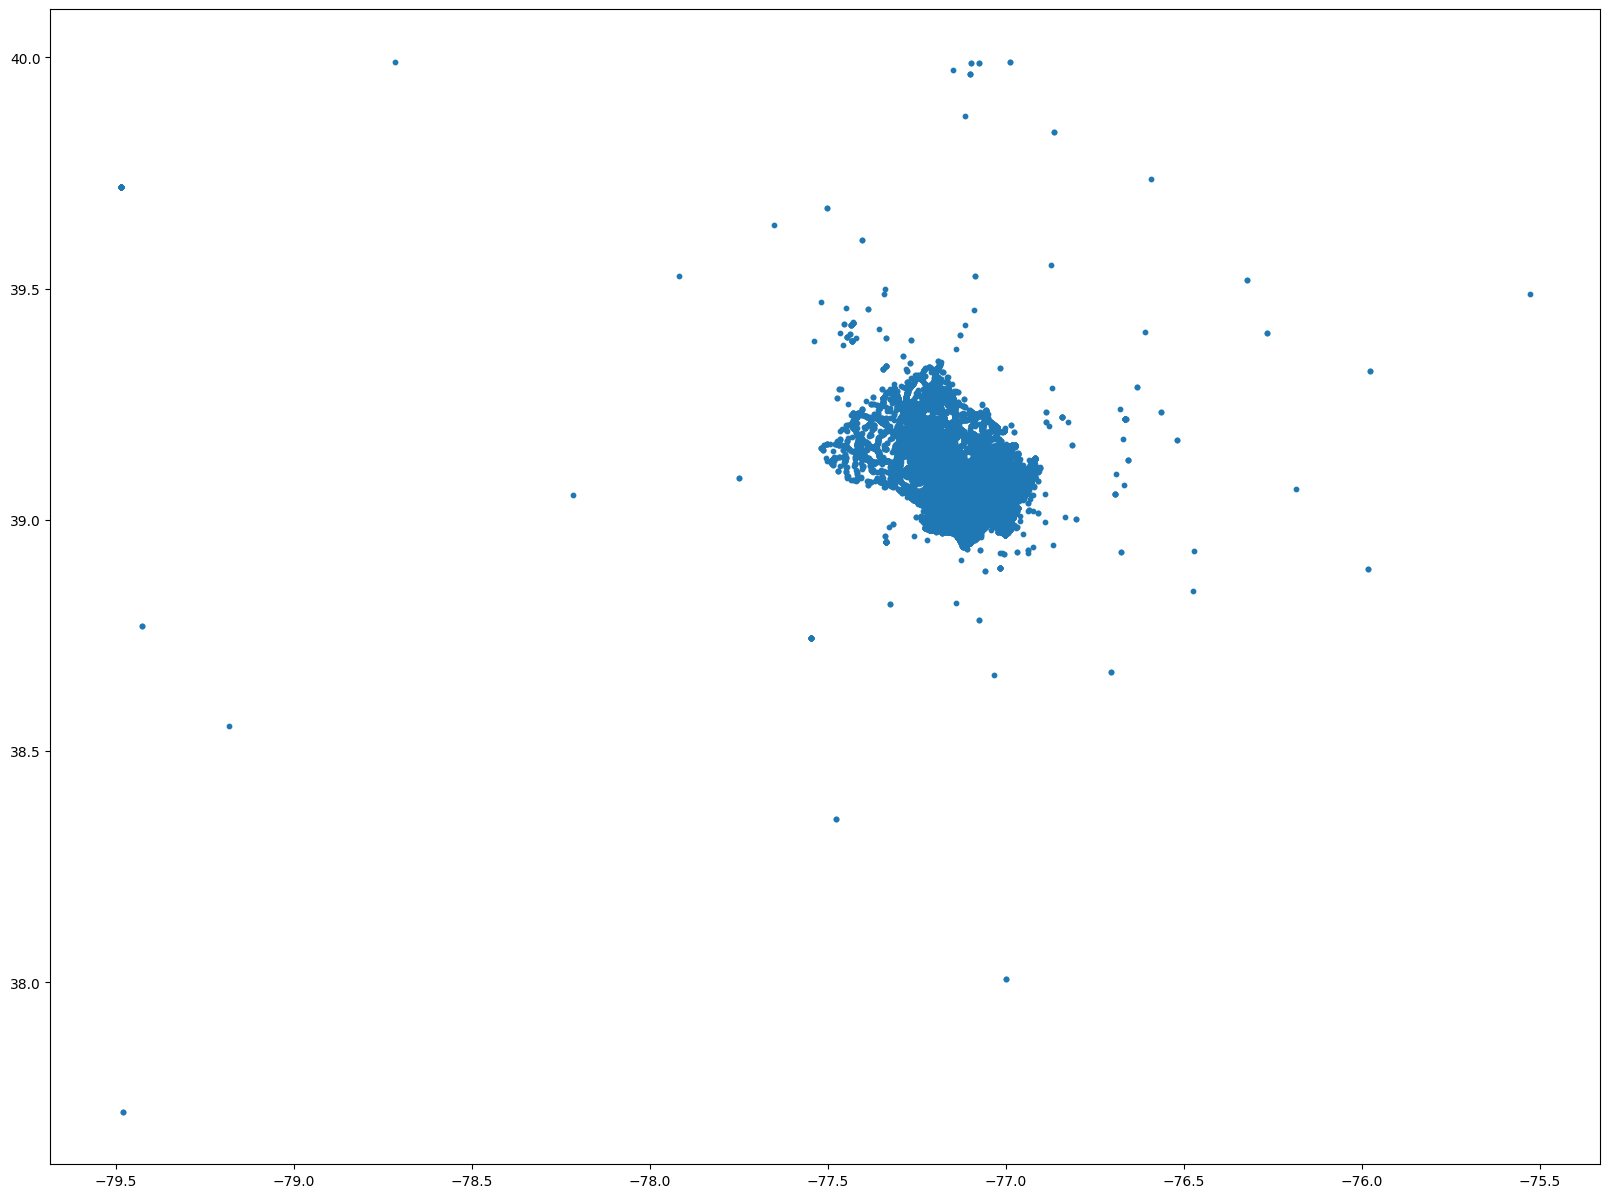

In [160]:
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10);

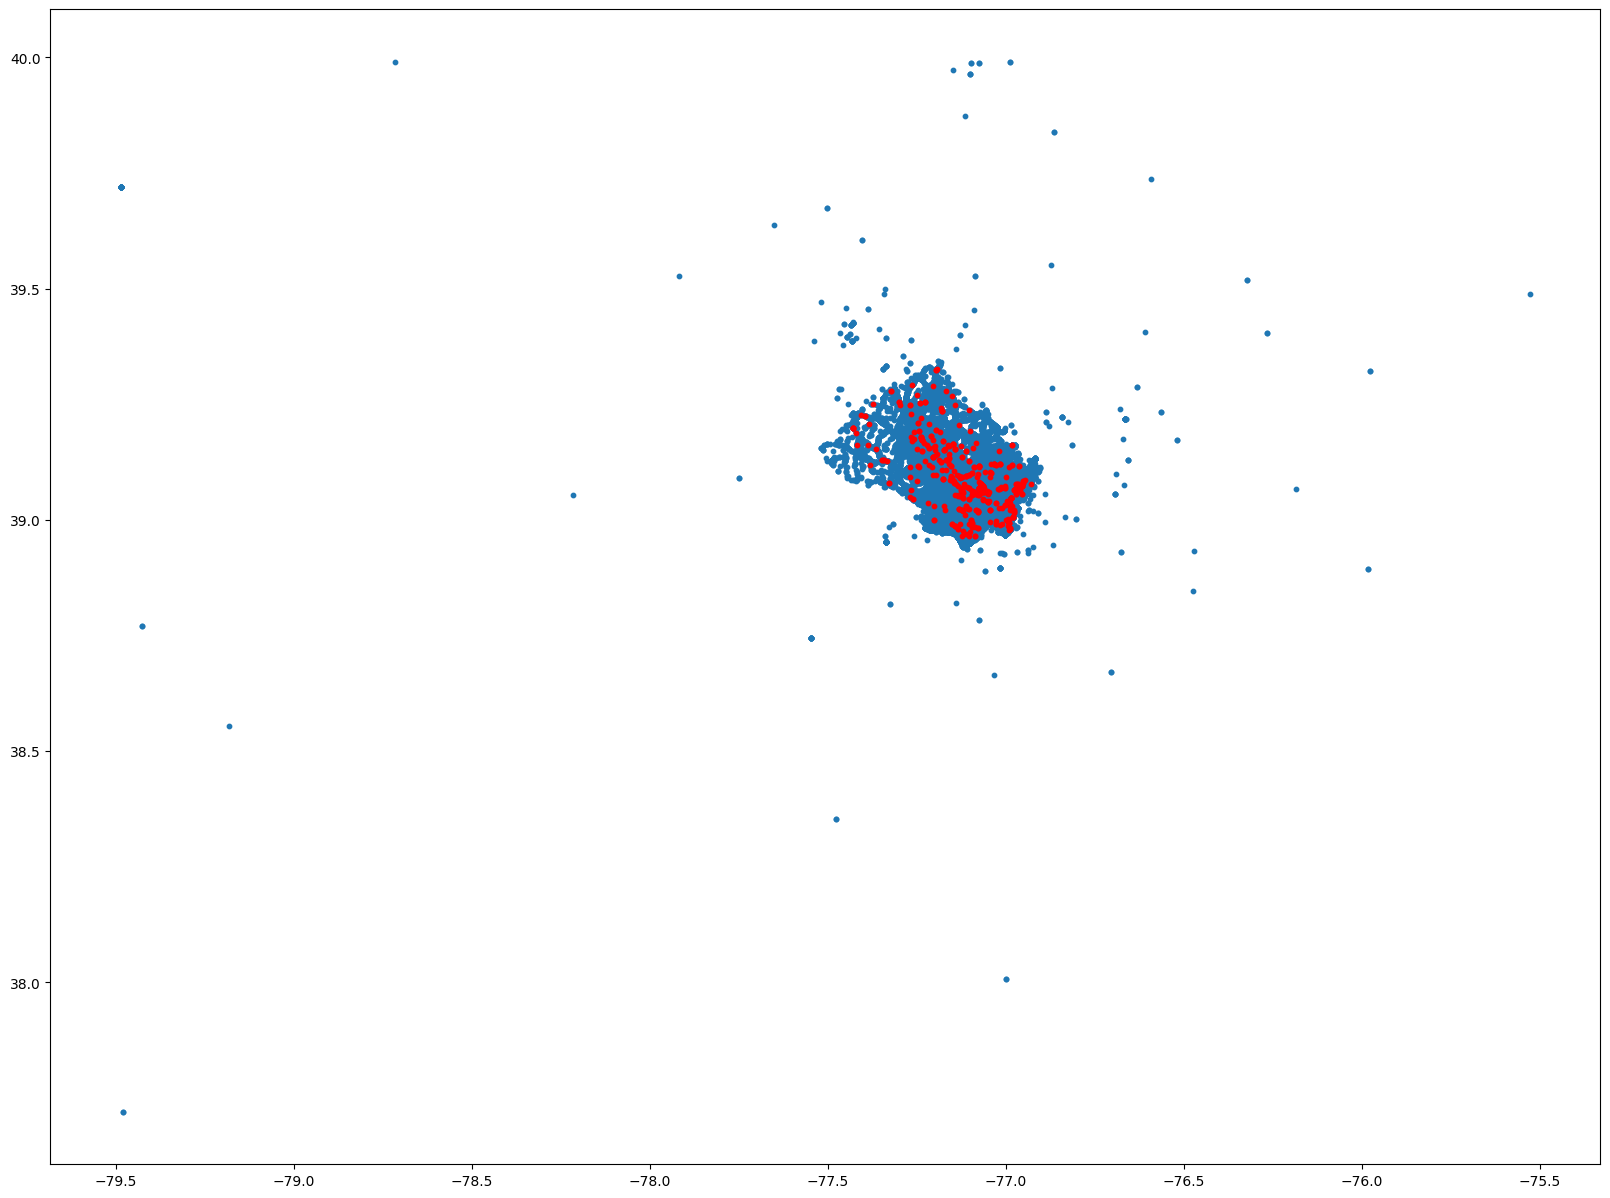

In [161]:
Fatal_Crashes=df[df['ACRS Report Type']=='Fatal Crash']
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10)
plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


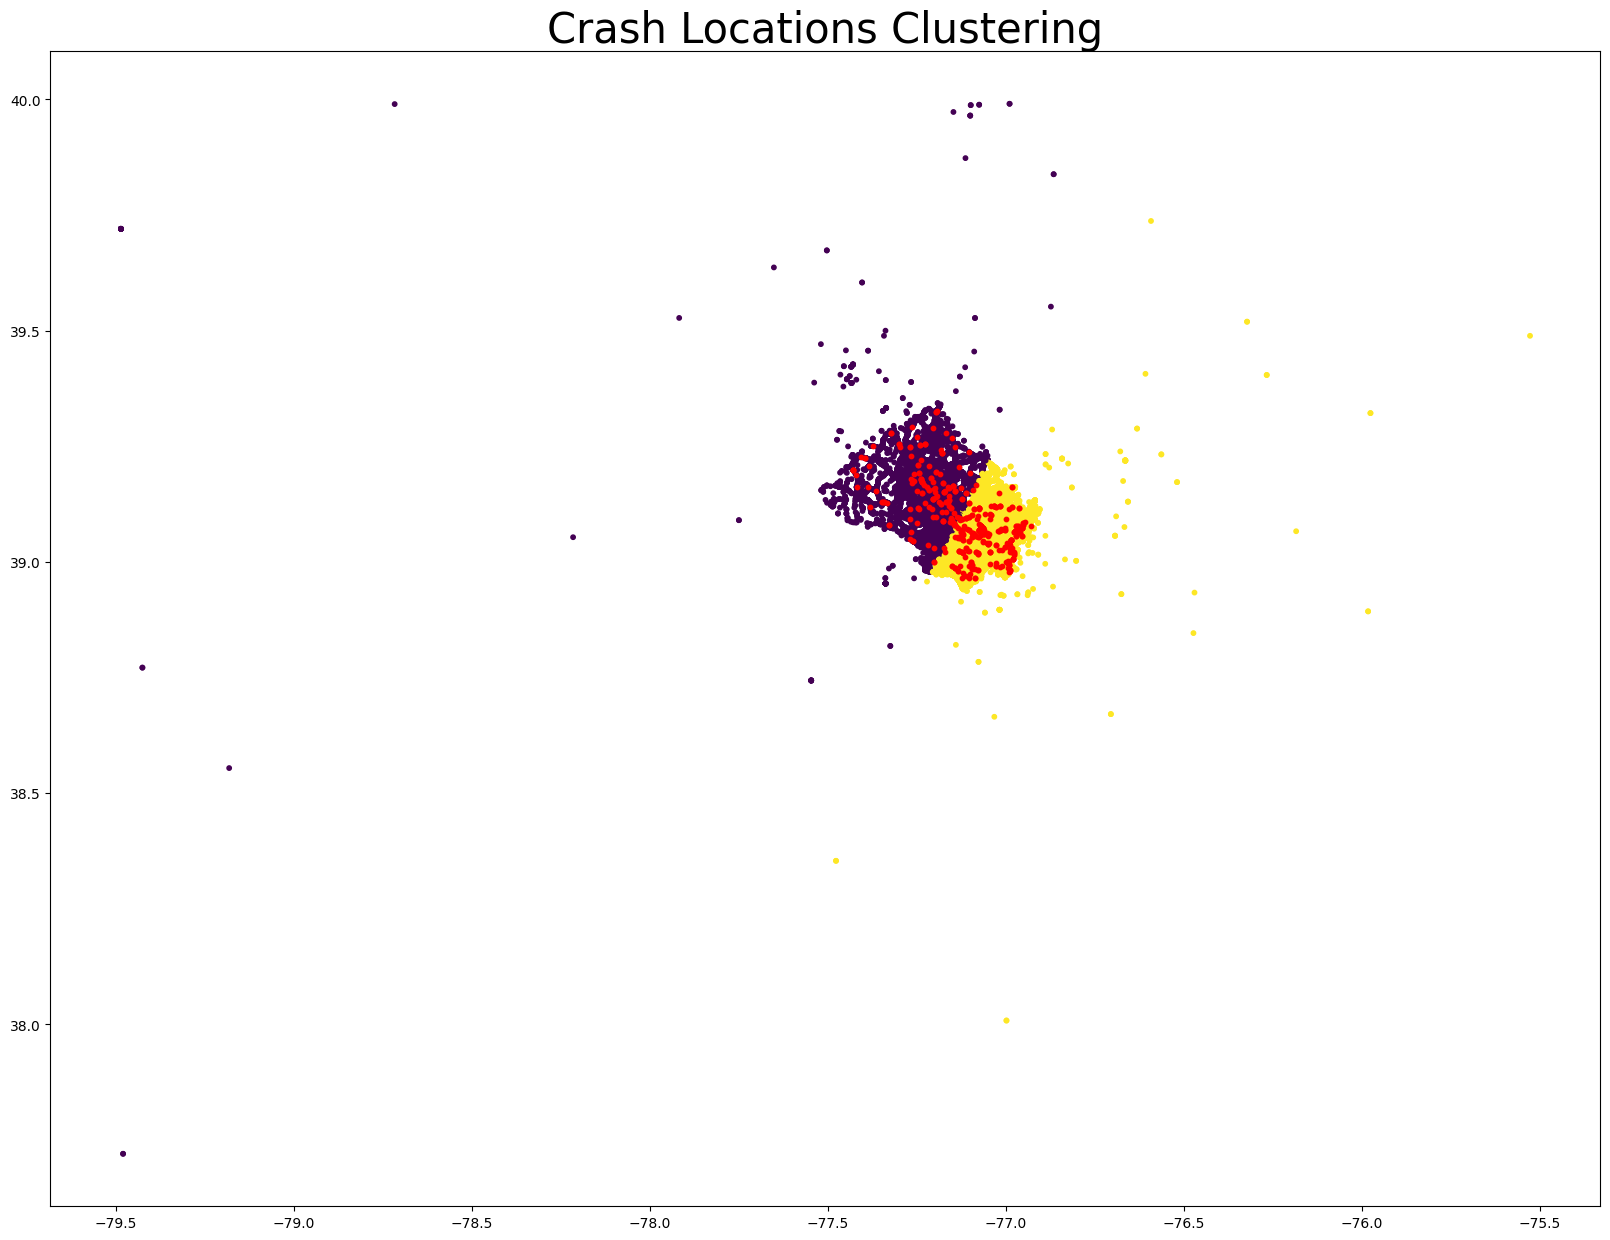

In [162]:
model=KMeans(n_clusters=2)
model.fit(df[['Longitude','Latitude']])
clusters=model.predict(df[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df['Longitude'],df['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


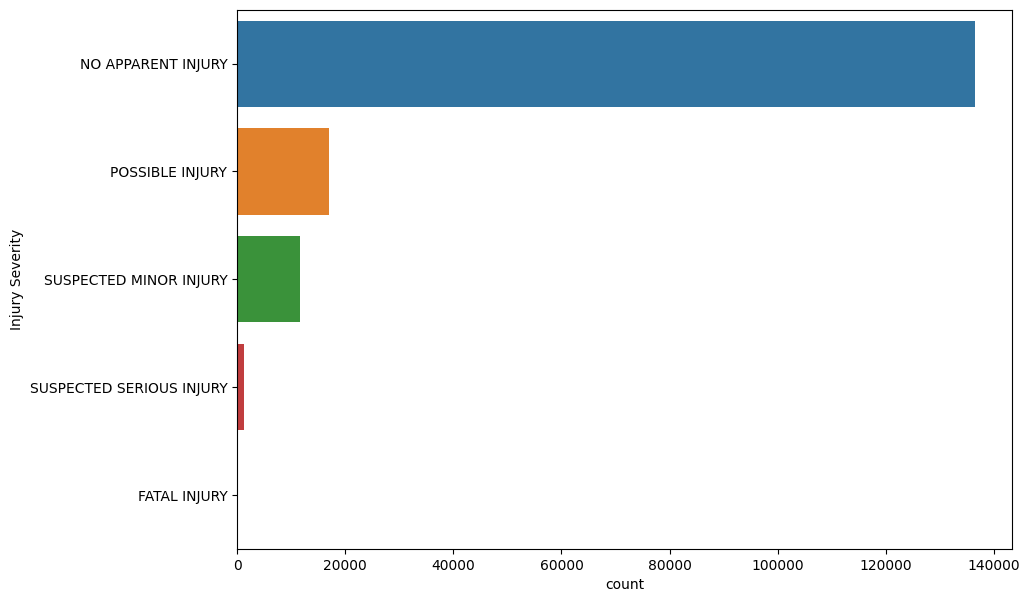

In [163]:
plt.figure(figsize=(10, 7))
sns.countplot(y='Injury Severity',data=df,order=df['Injury Severity'].value_counts().index);

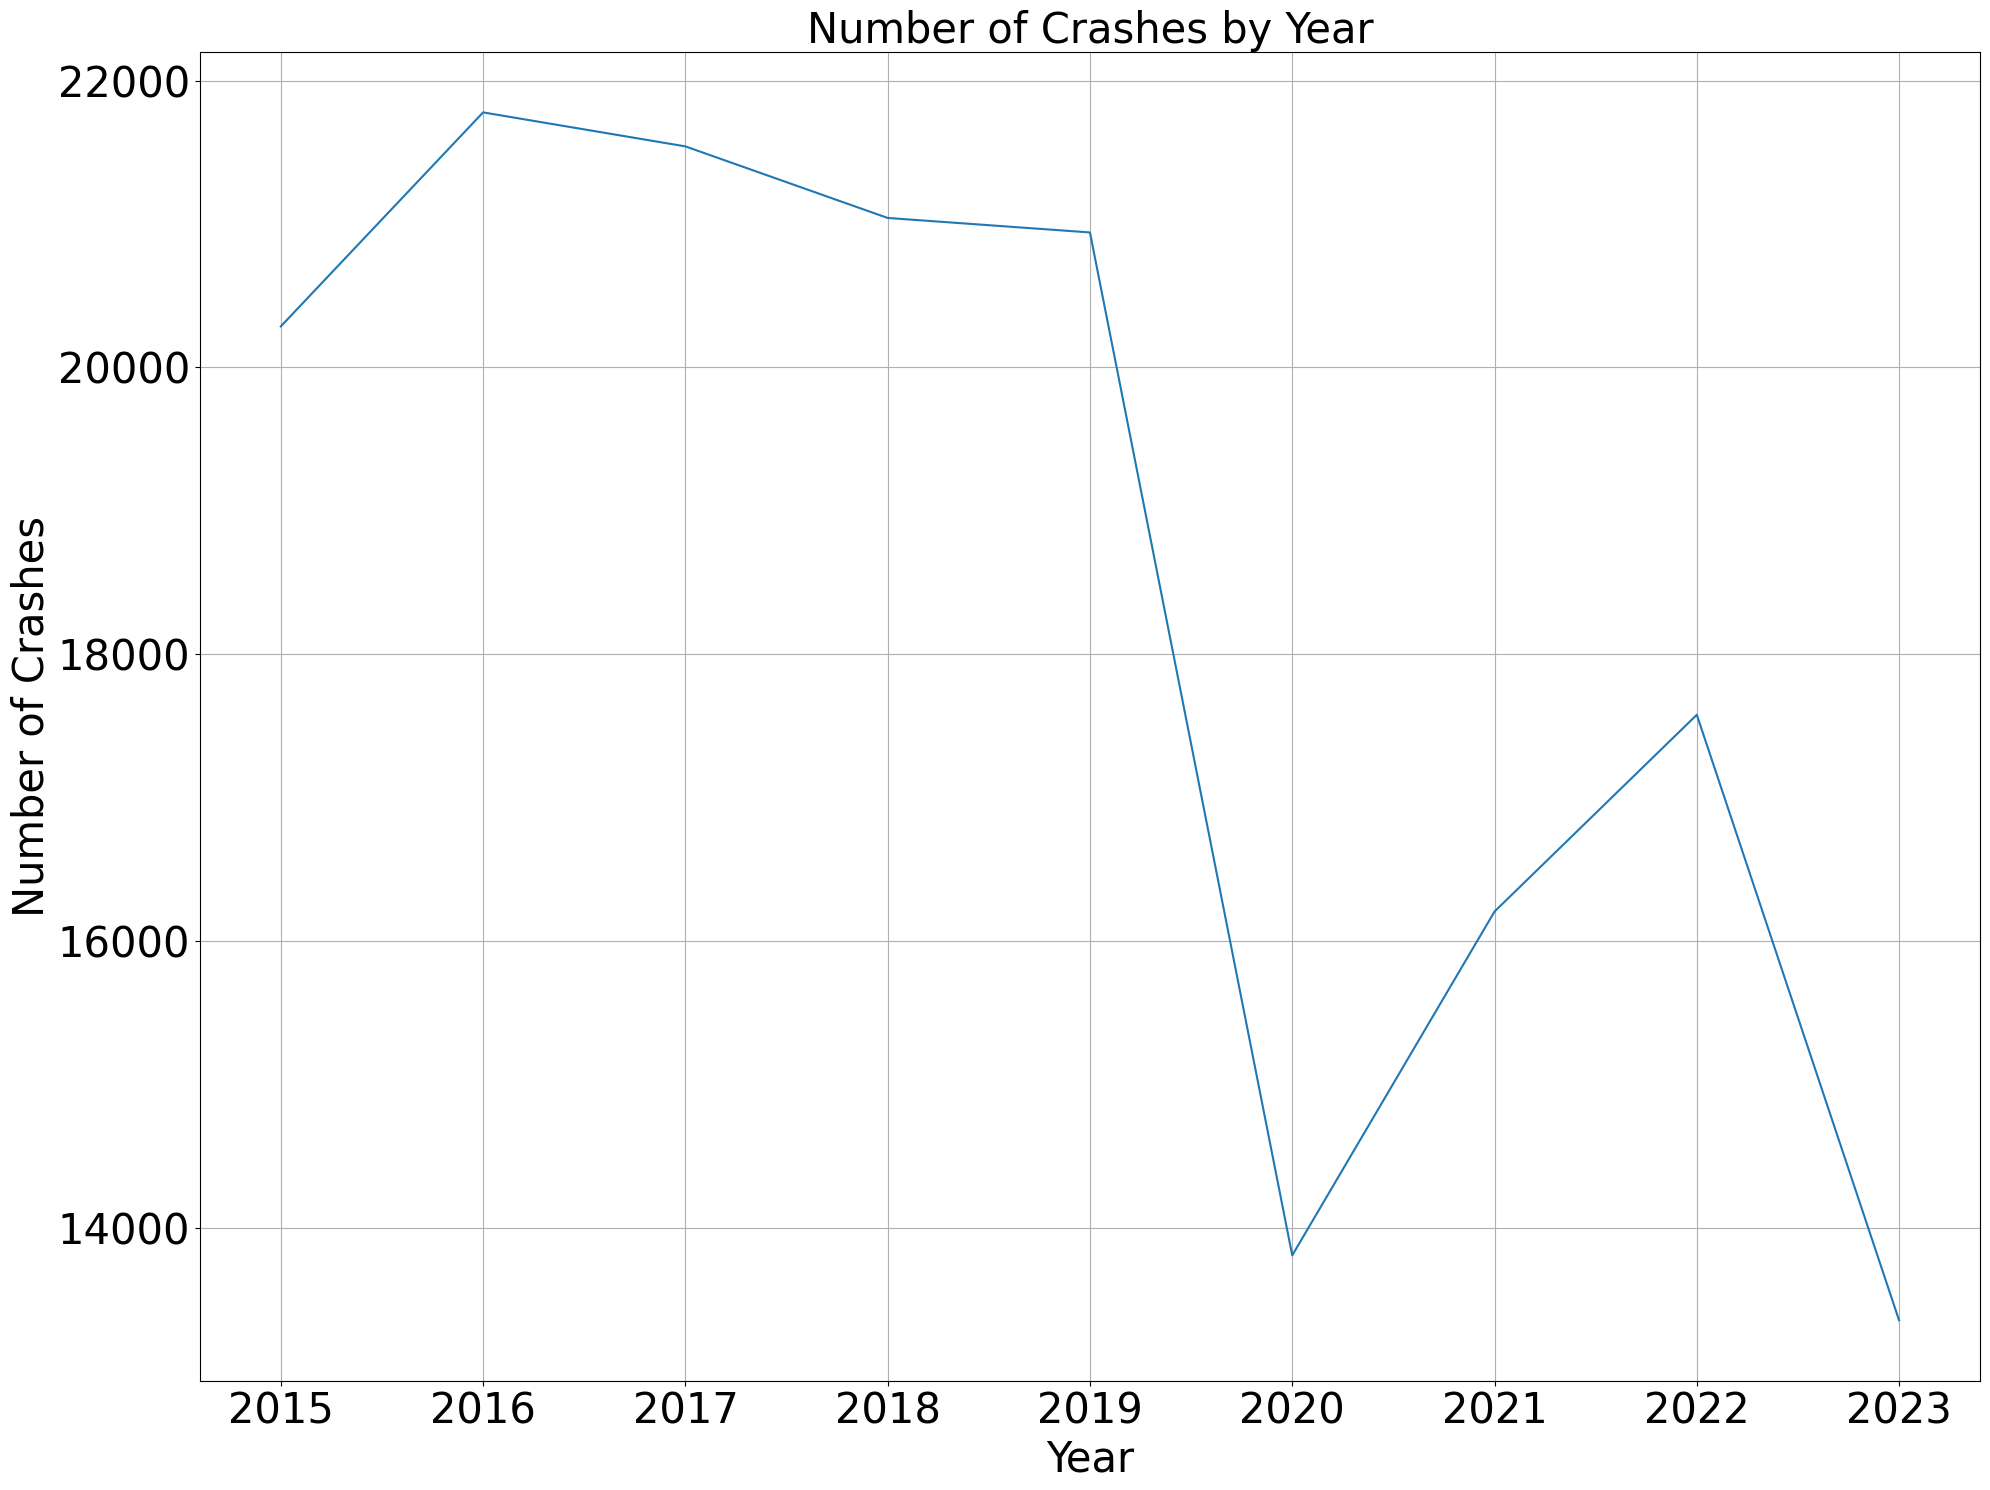

In [164]:
df['Crash Date/Time'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Year',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

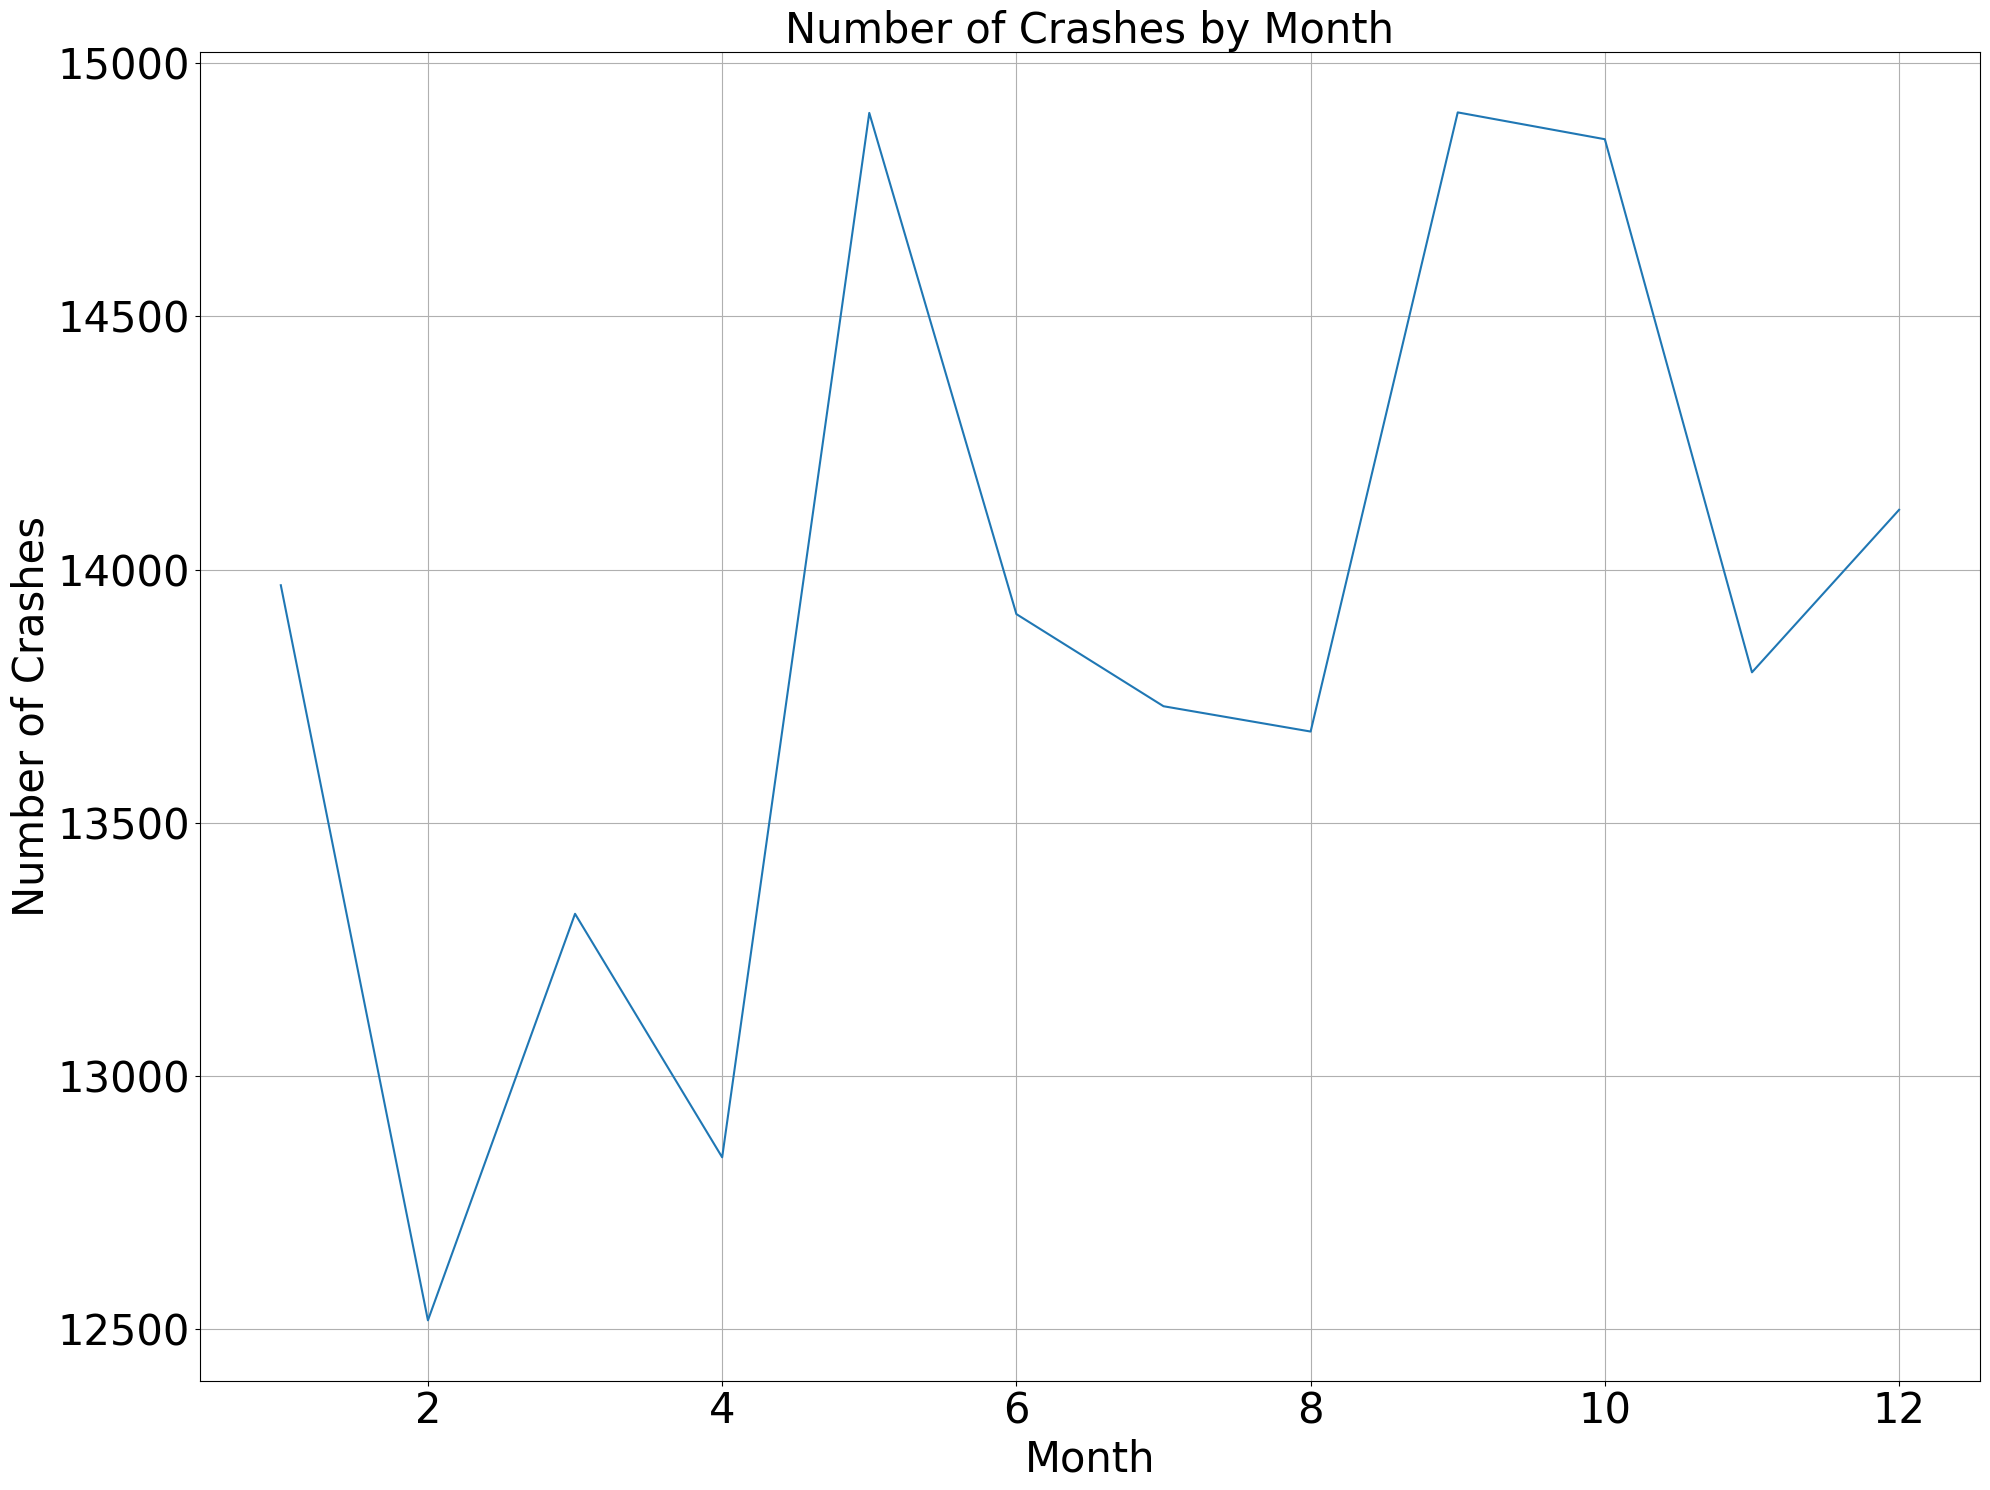

In [165]:
df['Crash Date/Time'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Month', fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

- Least number of crashes in 2020 possibly due to covid. 
- 2023 is notably less because the year isnt over yet

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


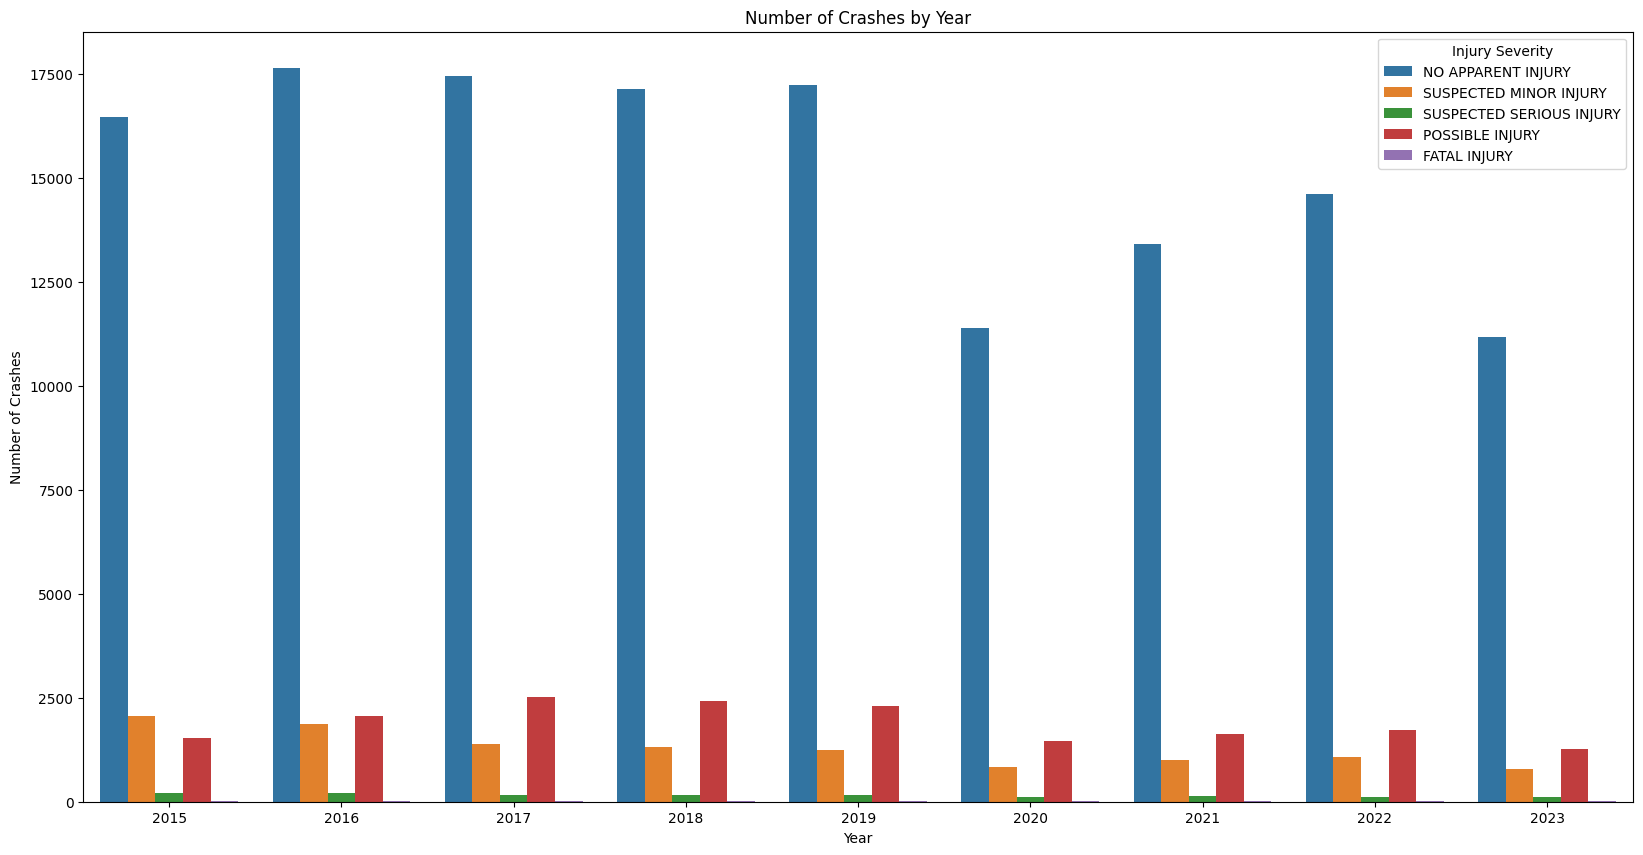

In [166]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Crash Date/Time'].dt.year, hue=df['Injury Severity'])
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


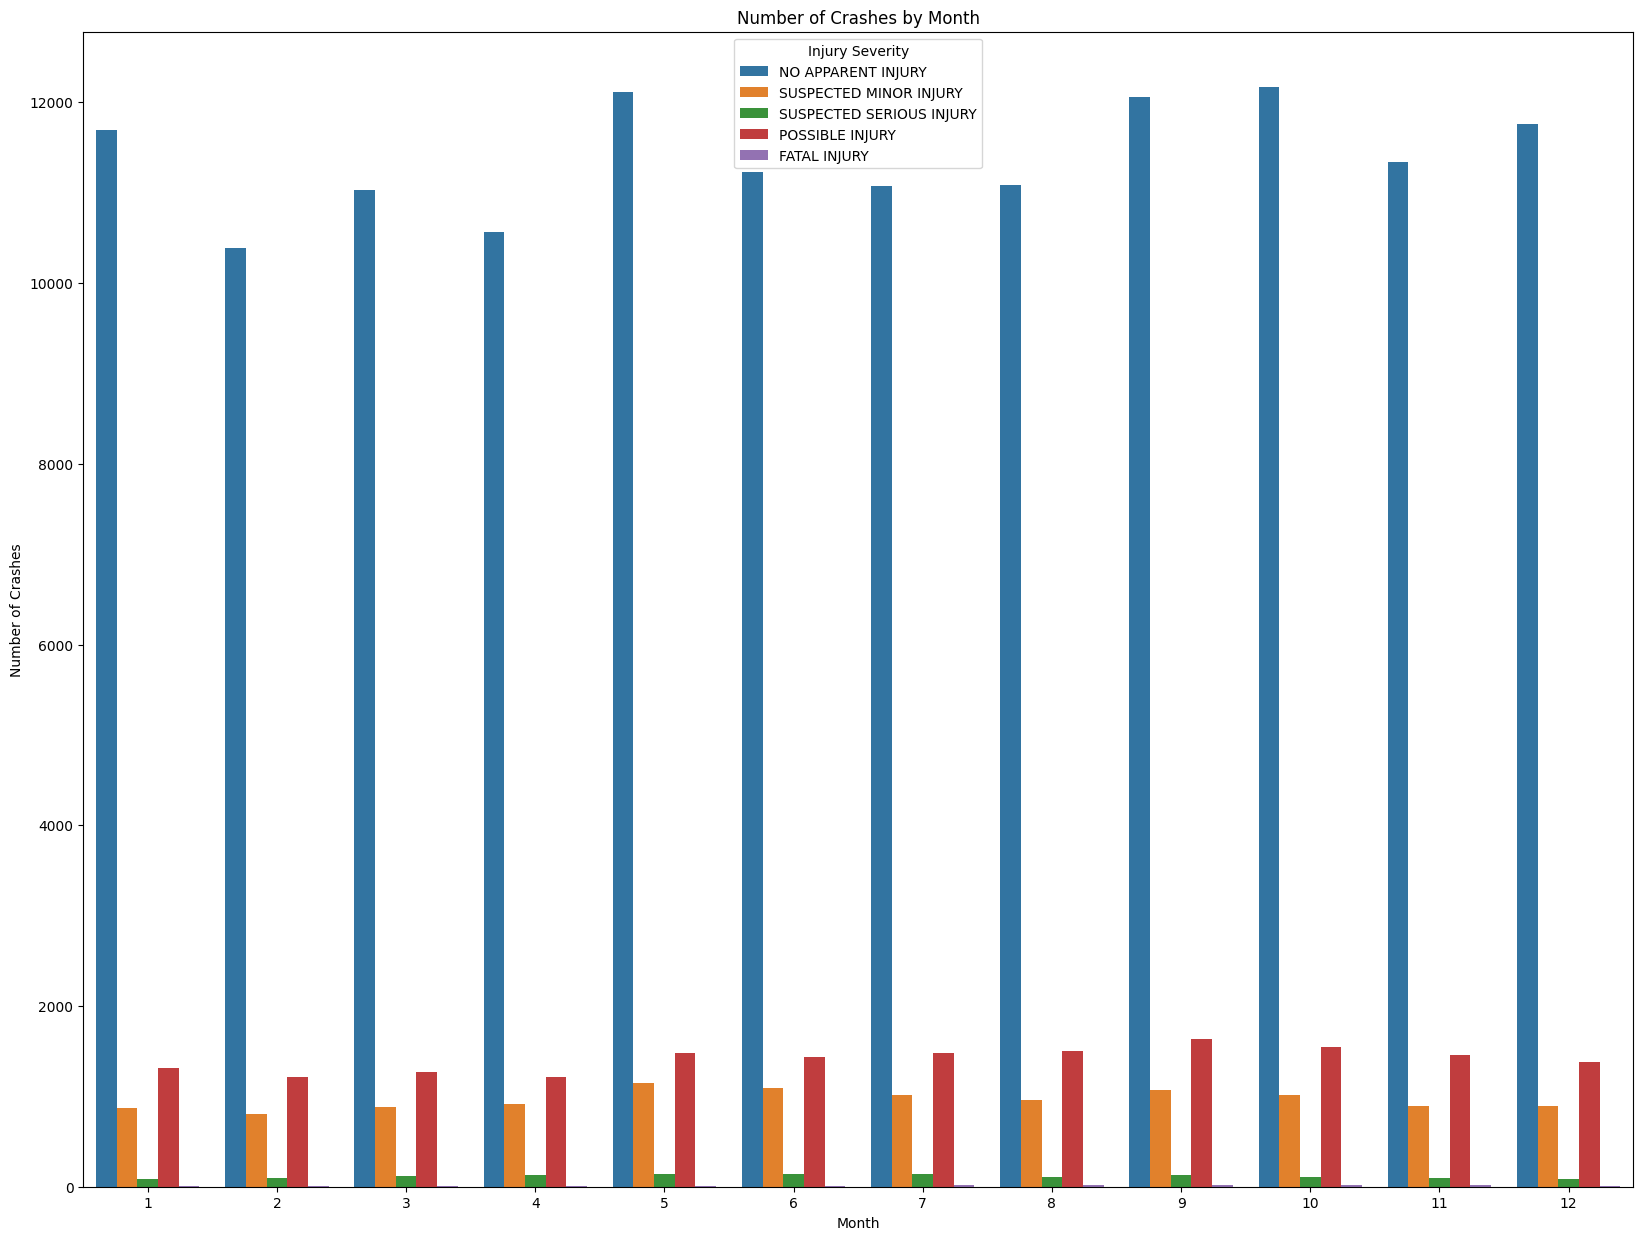

In [167]:
# crash monthly granularity
plt.figure(figsize=(20, 15))
sns.countplot(x=df['Crash Date/Time'].dt.month, hue=df['Injury Severity'])
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes');

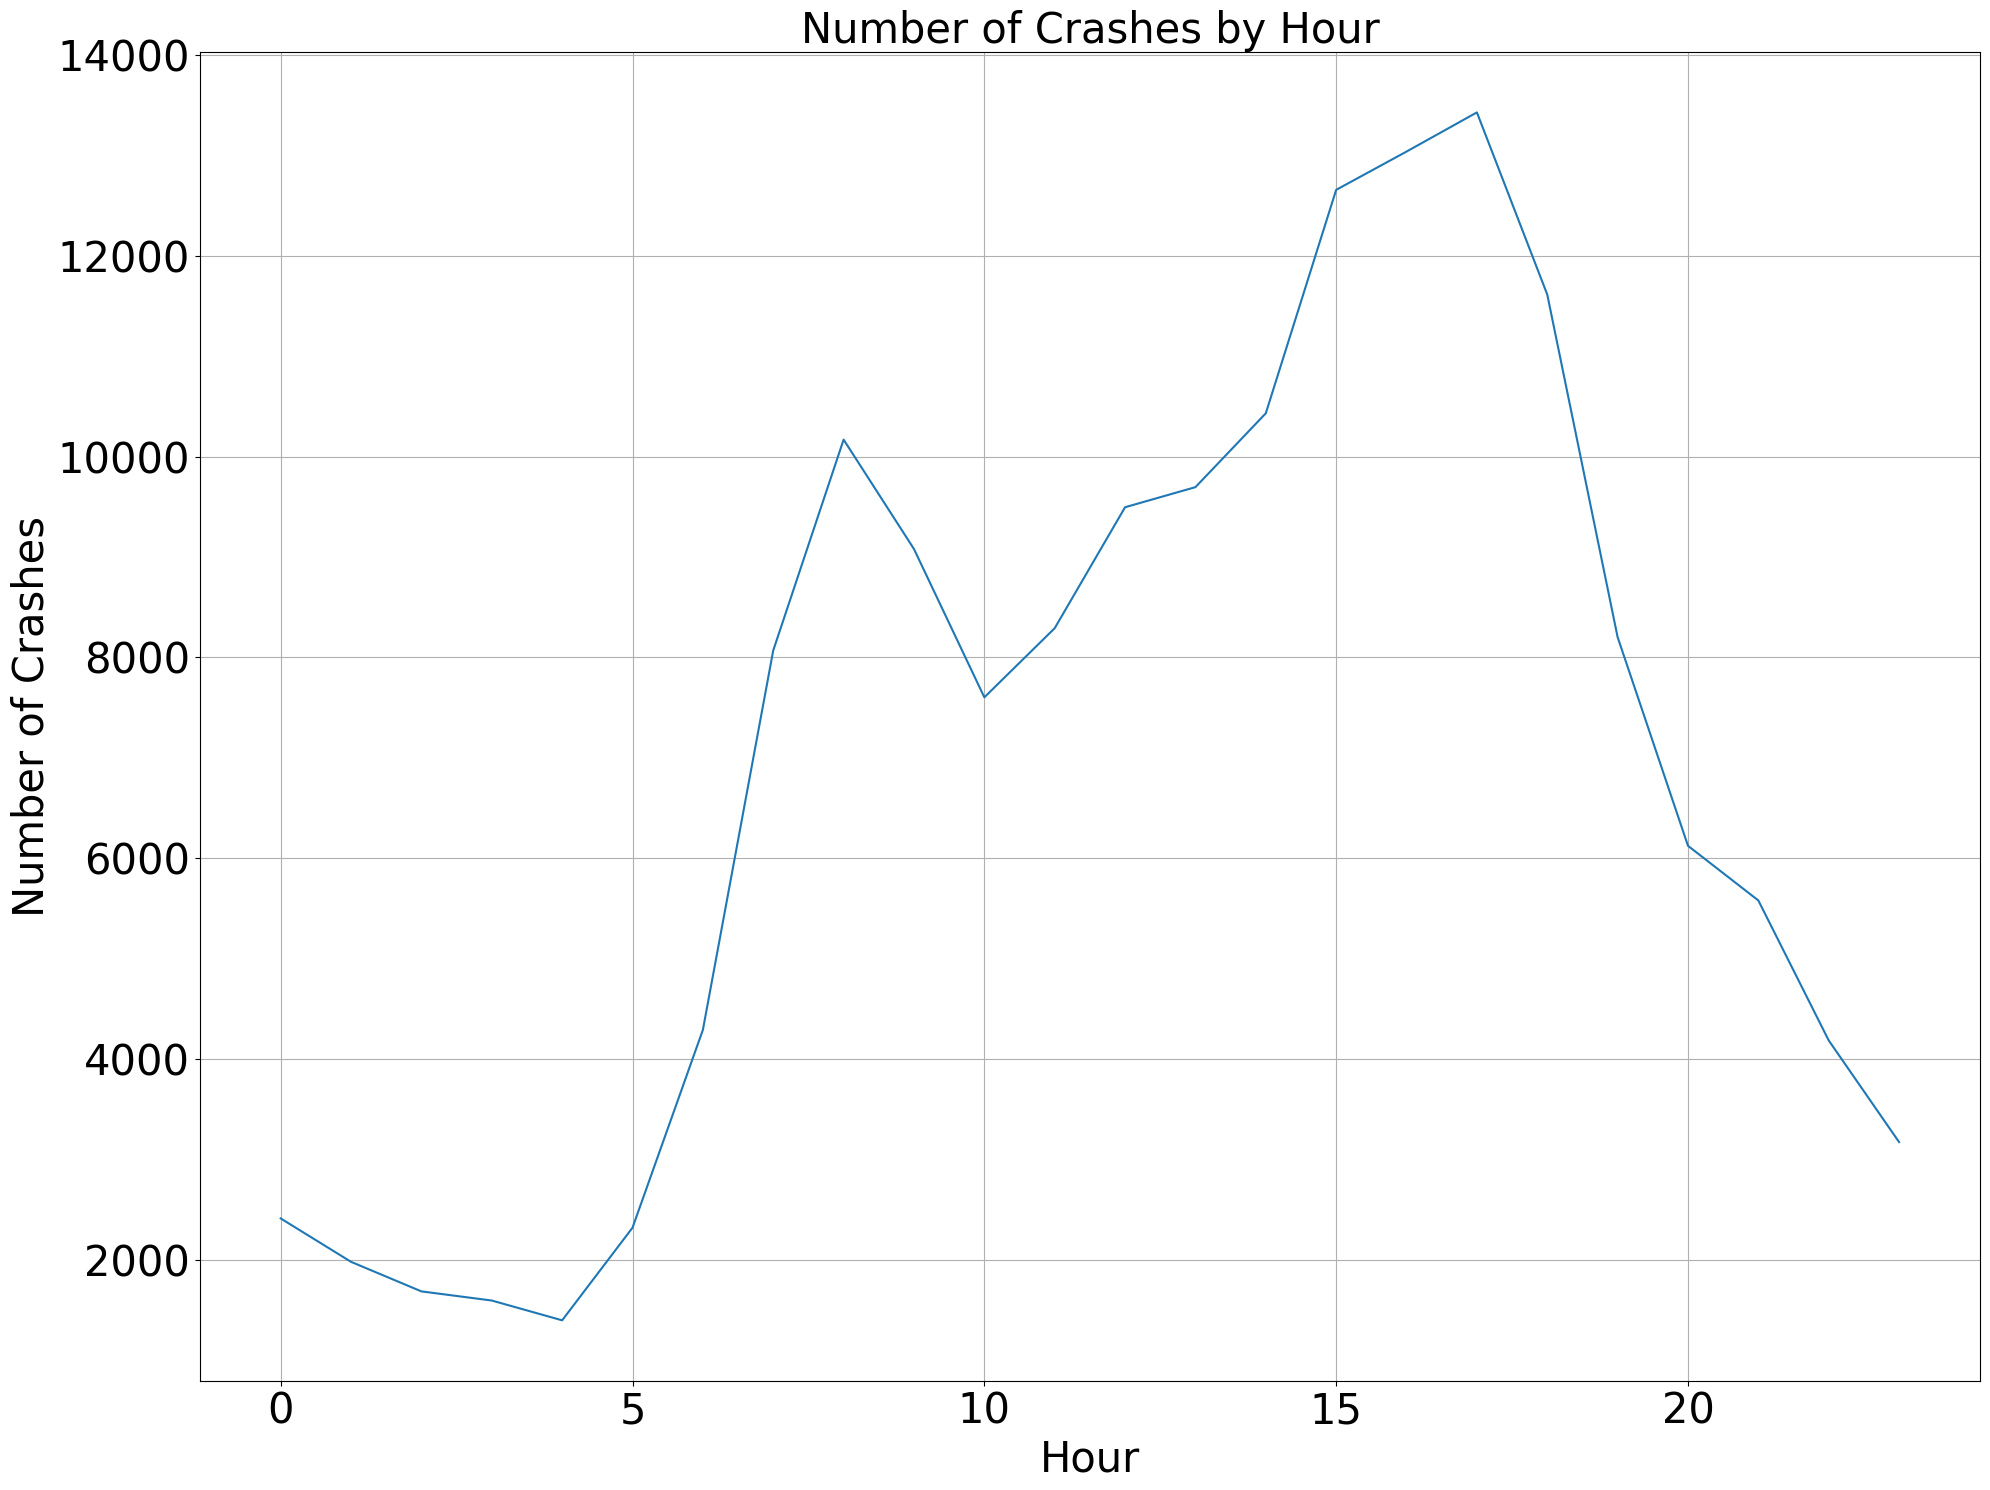

In [168]:
# accident hourly granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.hour.value_counts().sort_index().plot(kind='line')
#sns.countplot(x=df['Crash Date/Time'].dt.hour)
plt.title('Number of Crashes by Hour',fontsize=30)
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Number of Crashes', fontsize=30);
# inrease the fontsize of the xticks and yticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();


- Peak around 6pm due to rush hours

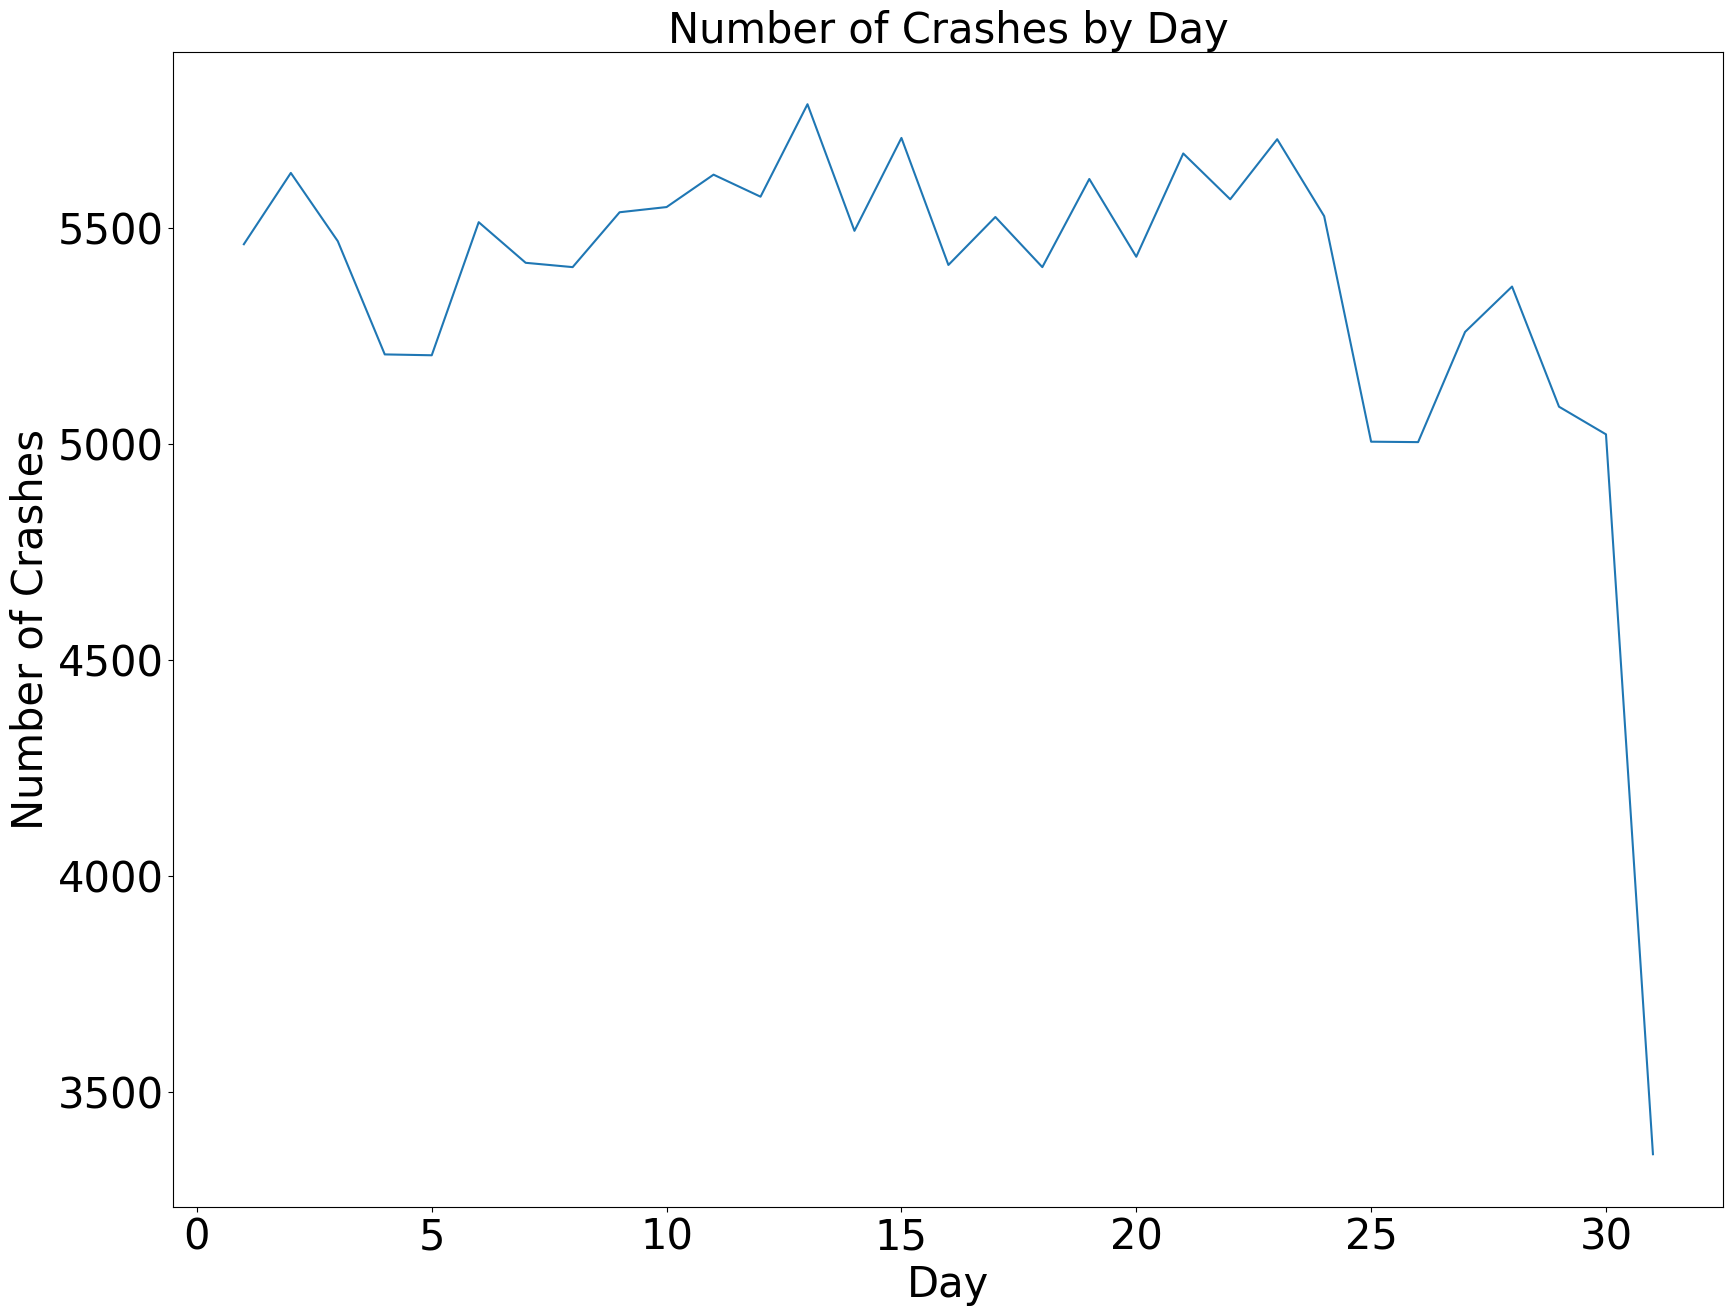

In [169]:
# accident daily granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.day.value_counts().sort_index().plot(kind='line')
plt.title('Number of Crashes by Day',fontsize=30)
plt.xlabel('Day',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


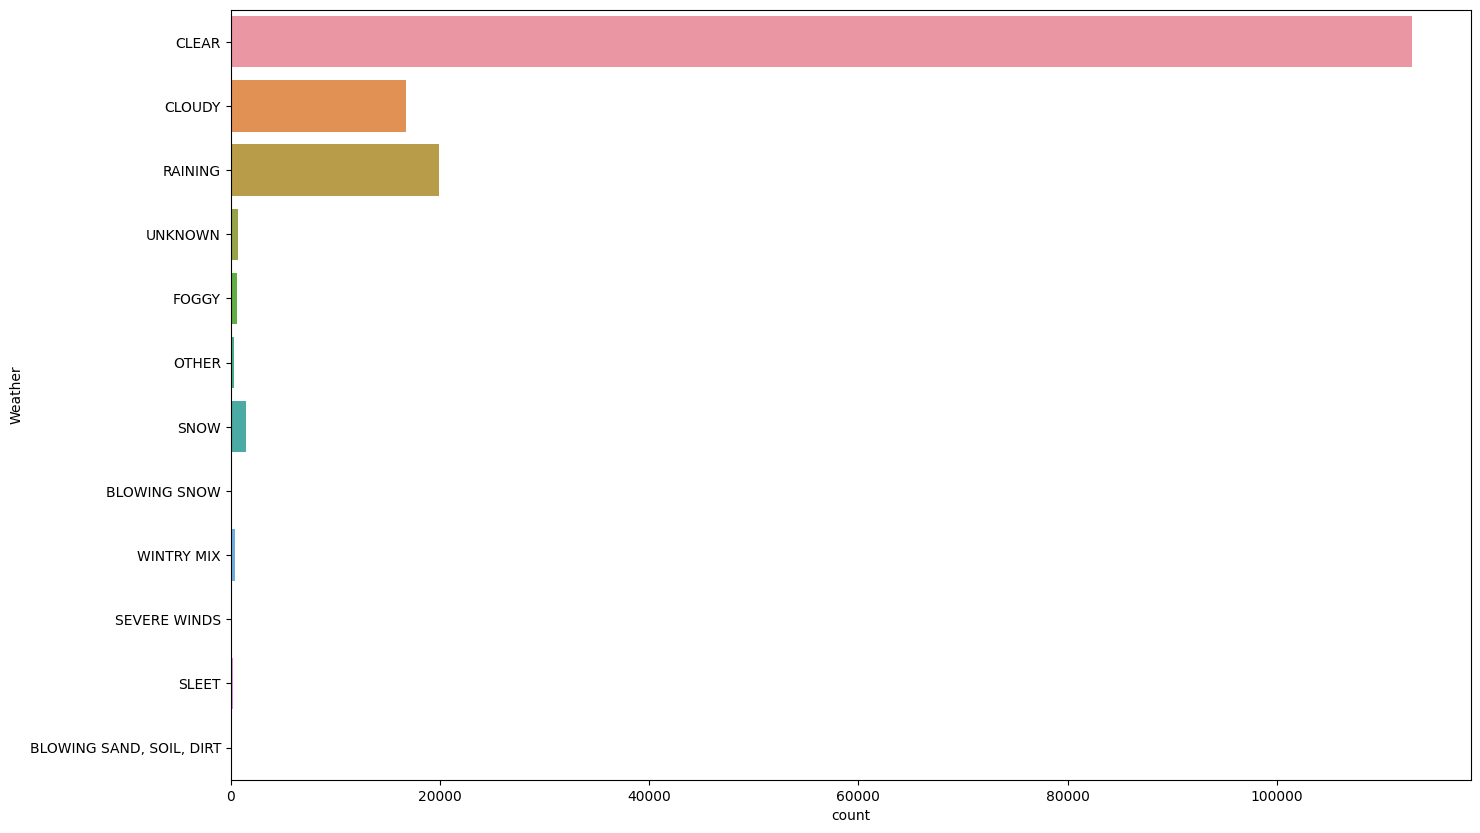

In [170]:
plt.figure(figsize=(16, 10))
sns.countplot(y=df['Weather']);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


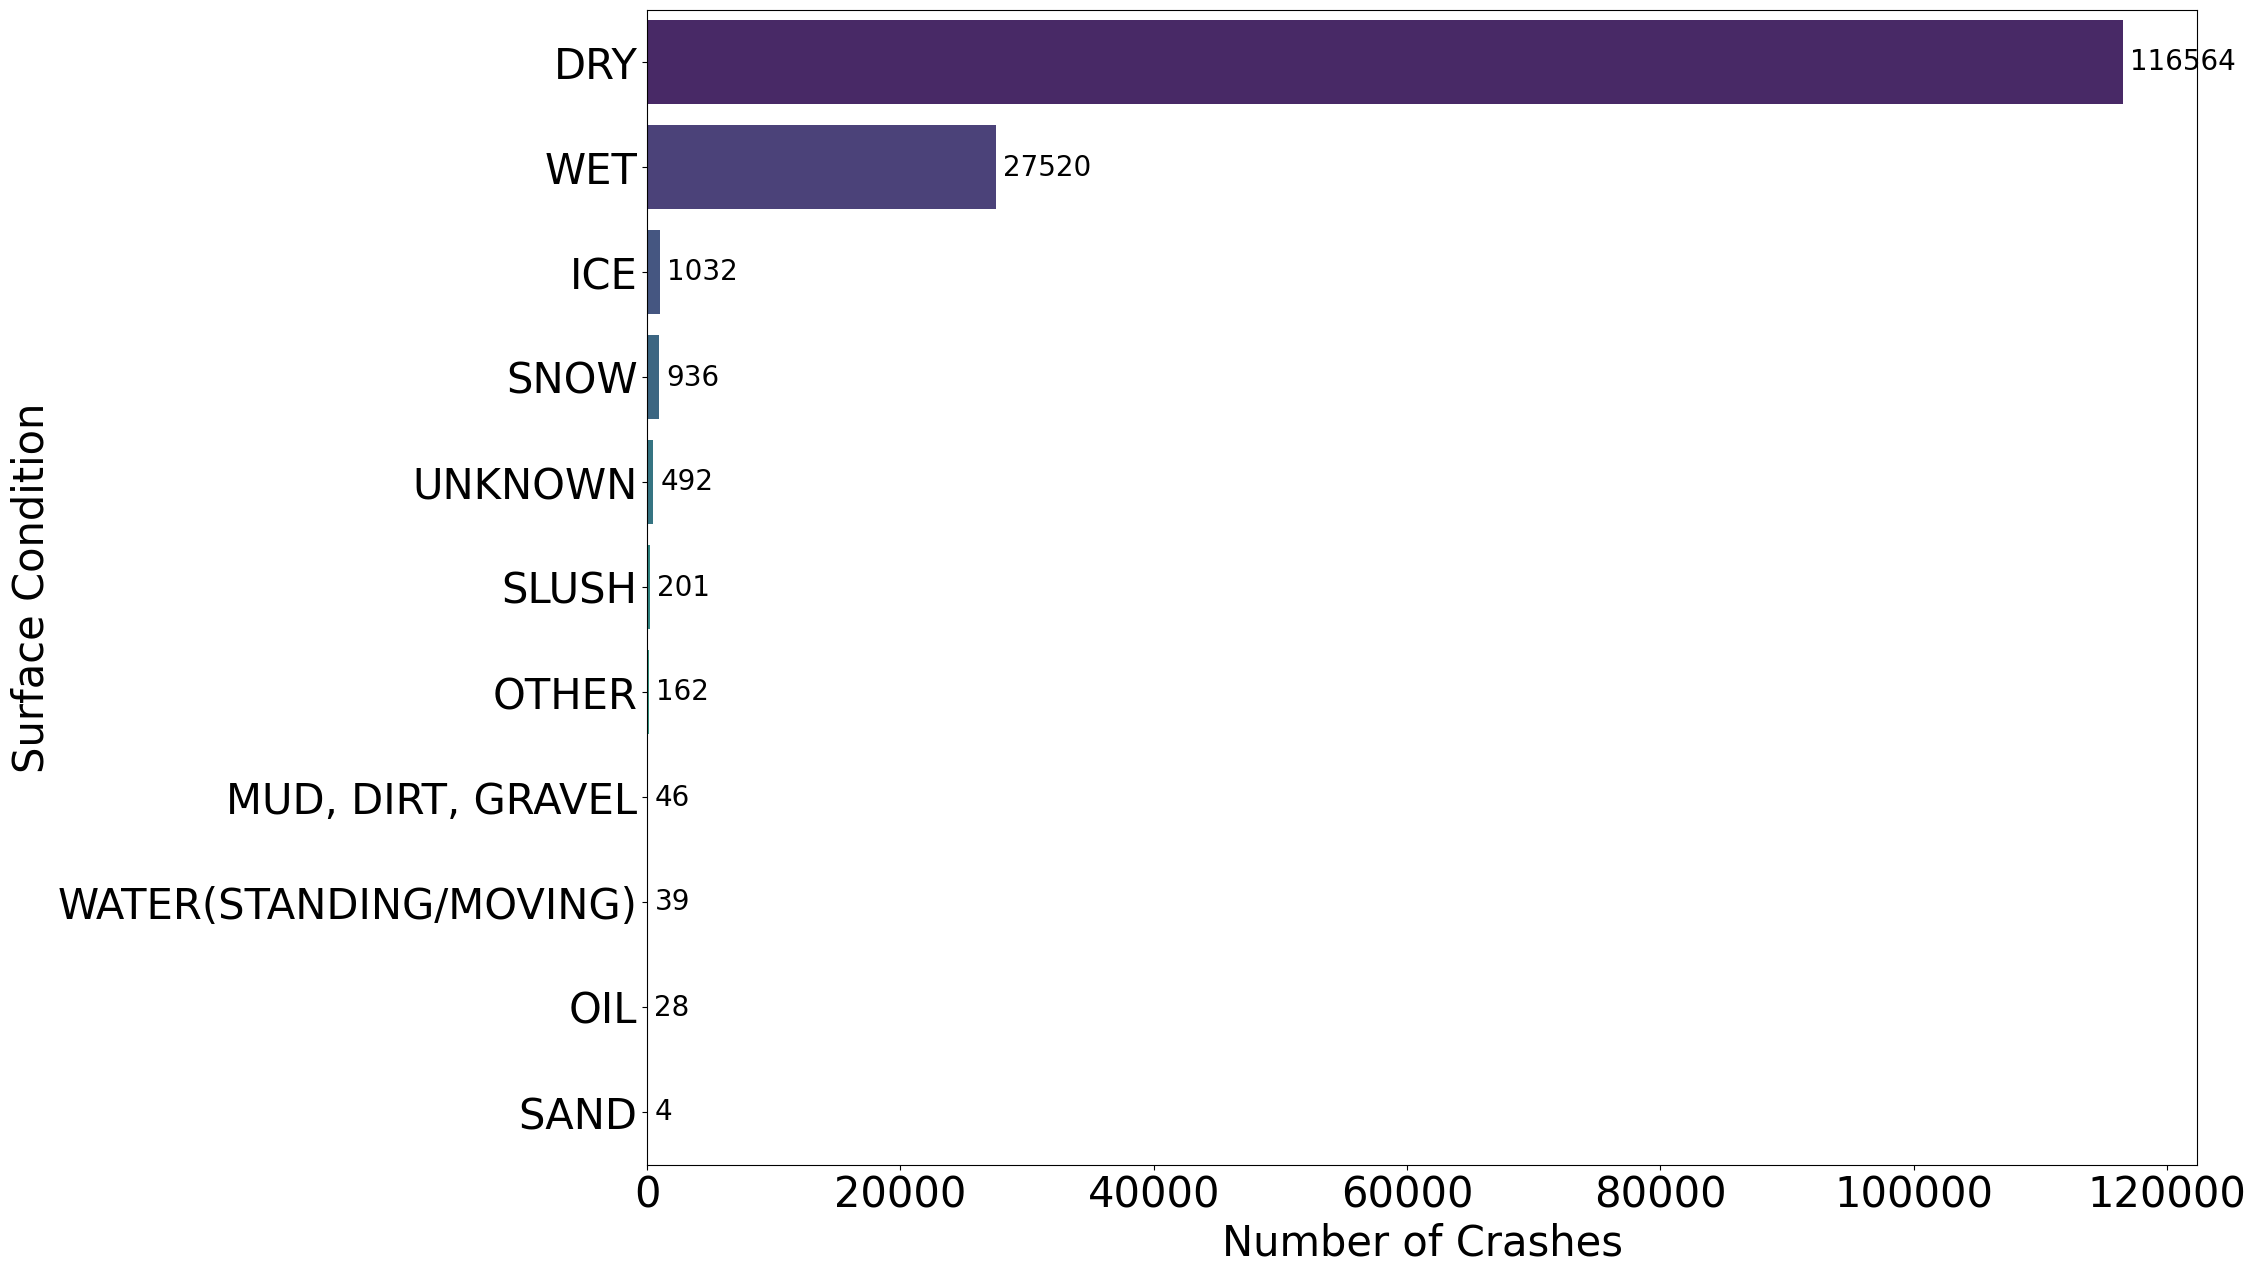

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Order bars by count
order = df['Surface Condition'].value_counts().index

# Plot
ax = sns.countplot(y=df['Surface Condition'], order=order, palette="viridis")

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', ha='left', xytext=(5,0), textcoords='offset points', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of Crashes',fontsize=30)
plt.ylabel('Surface Condition',fontsize=30)

plt.show()


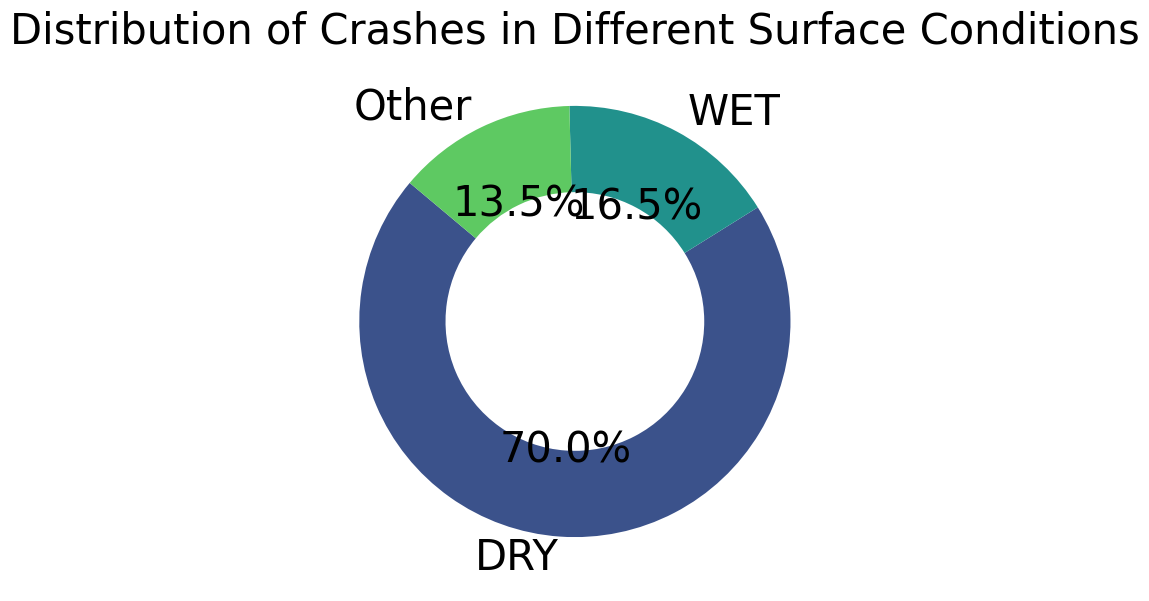

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Modified Conditions']=df['Surface Condition'].apply(lambda x: 'Other' if x not in ['WET','DRY'] else x)

# Data preparation
surface_condition_counts = df['Modified Conditions'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(15, 7))
colors = sns.color_palette("viridis", len(surface_condition_counts))
plt.pie(surface_condition_counts, labels=surface_condition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), textprops={'fontsize': 30})
plt.title('Distribution of Crashes in Different Surface Conditions', fontsize=30)

plt.show()


# Model Building 
Before building the models, we performed the following additional preprocessing steps
- Used Kmeans to cluster the longitudes and latutitudes and created a new feature that contains the resulting clusters
- Grouped the date/time columns as follows:
    - Day column was grouped into beginning, middle, and end of the month
    - Hour column was grouped into morning, afternoon, evening, and night
    - Month column was grouped into summer, winter, spring, and fall
   
- We grouped all instatnces of injury and fatality in the injury severity column as injury and others as no injury
 loss. Also, we will benefit from the improved speed that comes with working with less obeservations
## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- After dropping the missing values, we assessed the data loss; we found that dropping the missing values did not lead to significant data
 - In addition to dropping null values, we dropped all the observations with unknown
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.

## Class Distribution 
- There is a class imbalance in the data set with a ratio of 70-30 with the postive instances being the minority class.
- To deal with this we tried several methods. First, we used the inbuilt class weight funtion in Random forest. To assigns a bigger weight to the minority class. Since XGBoost doesnt have the class weight paramet, we used its  equivalent for XGBoost which is Scale-pos-weight.
- We also tried undersampling to see if performance will improve. We thought this will be a good idea because the dataset is large, and we would benefit from the improved speed.

In [173]:
df2['Injury Severity'].value_counts(normalize=True)

Injury Severity
NO APPARENT INJURY          0.793781
POSSIBLE INJURY             0.118925
SUSPECTED MINOR INJURY      0.077997
SUSPECTED SERIOUS INJURY    0.008570
FATAL INJURY                0.000727
Name: proportion, dtype: float64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


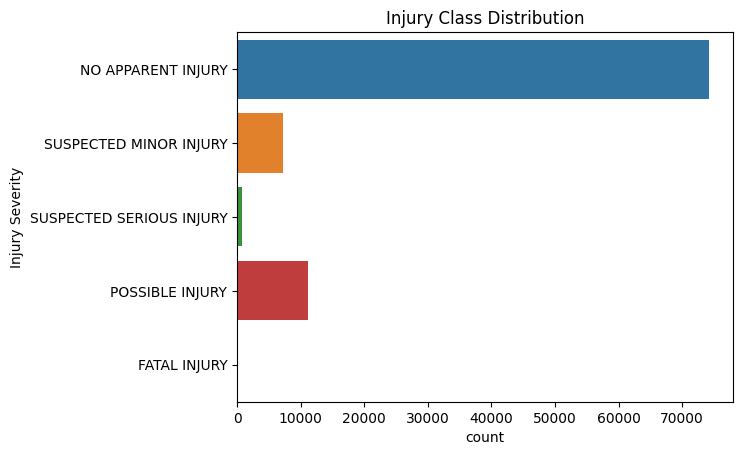

In [174]:
sns.countplot(y=df2['Injury Severity']);
plt.title('Injury Class Distribution');

In [175]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93580 entries, 1 to 166535
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ACRS Report Type                93580 non-null  object        
 1   Crash Date/Time                 93580 non-null  datetime64[ns]
 2   Route Type                      93580 non-null  object        
 3   Road Name                       93580 non-null  object        
 4   Cross-Street Type               93580 non-null  object        
 5   Cross-Street Name               93580 non-null  object        
 6   Collision Type                  93580 non-null  object        
 7   Weather                         93580 non-null  object        
 8   Surface Condition               93580 non-null  object        
 9   Light                           93580 non-null  object        
 10  Traffic Control                 93580 non-null  object        
 11  Injury

In [176]:
# drop observations with 'UNKNOWN' and 'Unknown' in the entire dataset
df2=df.dropna()
df2.replace(['UNKNOWN', 'Unknown'], np.nan, inplace=True)
df2.dropna(inplace=True)
df2.shape


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(81123, 30)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning


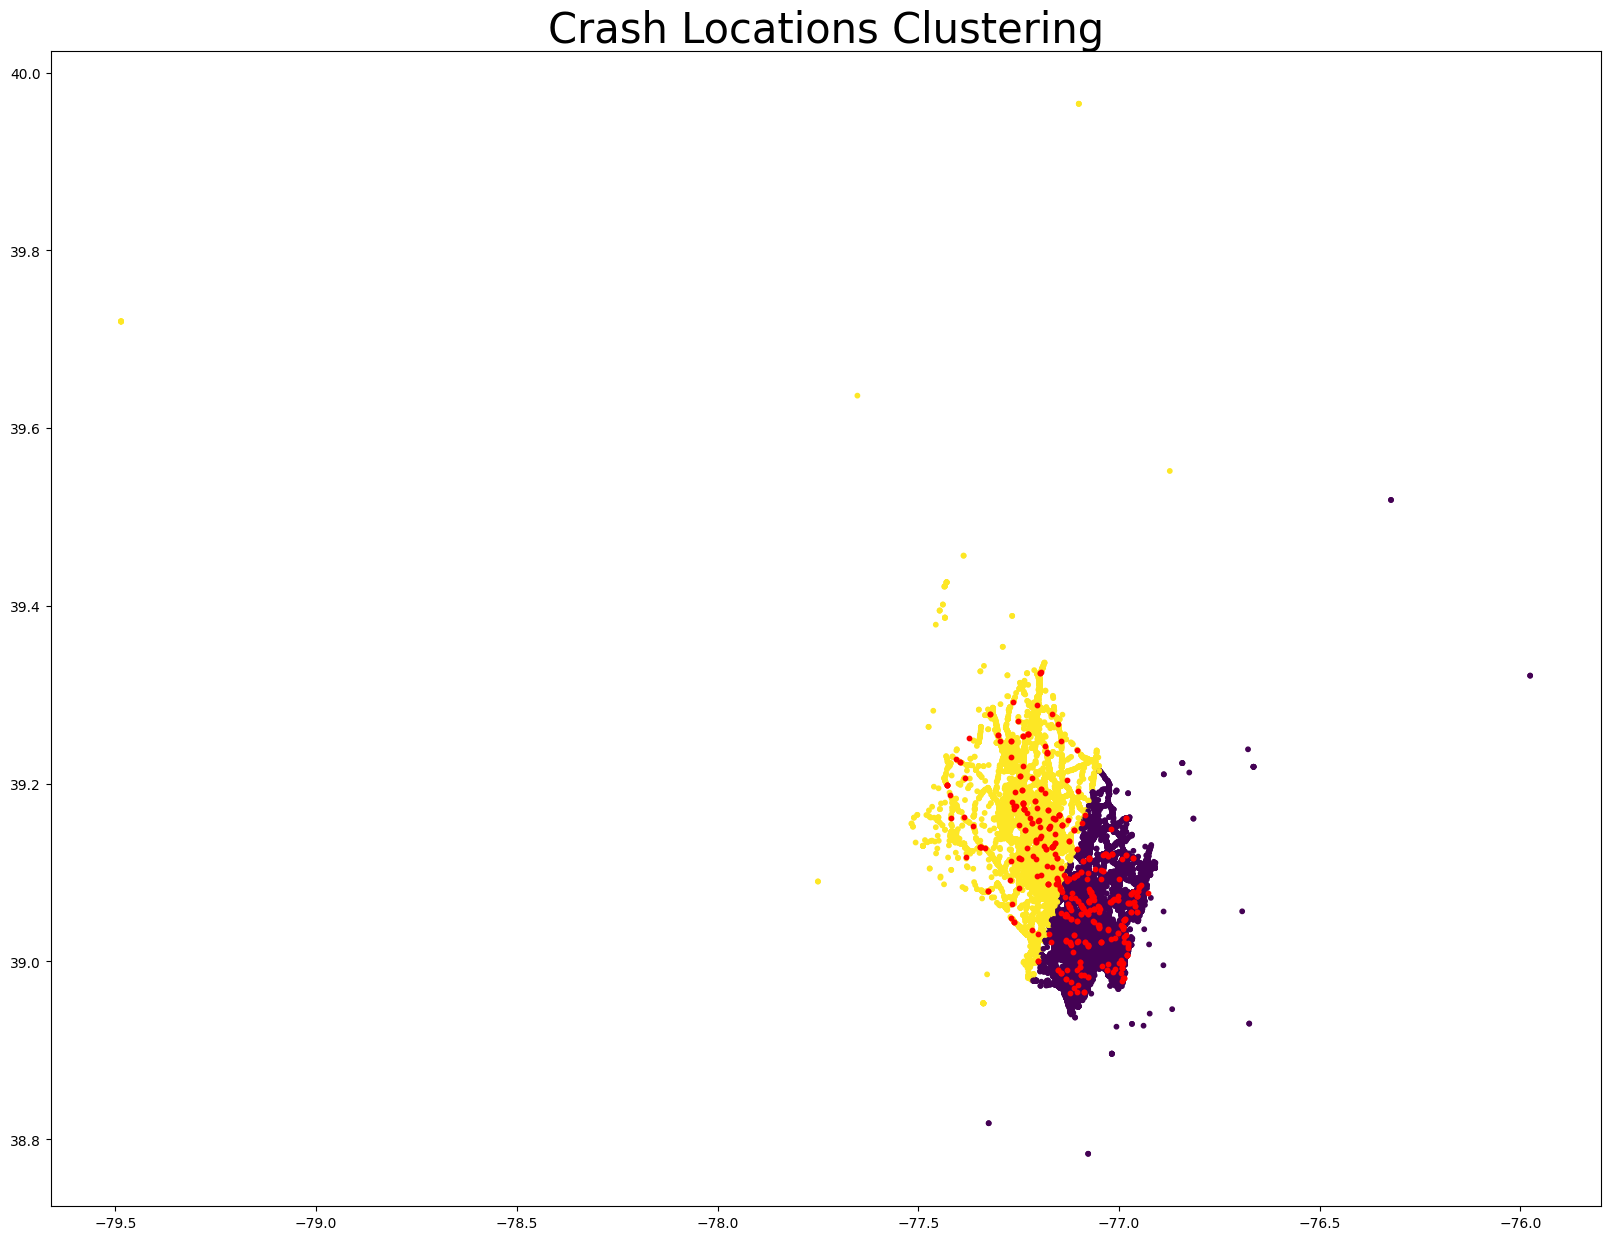

In [177]:
model=KMeans(n_clusters=2)
model.fit(df2[['Longitude','Latitude']])
clusters=model.predict(df2[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df2['Longitude'],df2['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);


In [178]:
df2['location_cluster']=clusters
df2.drop(['Longitude','Latitude'],axis=1,inplace=True)
df2['location_cluster'].value_counts()


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


location_cluster
0    49622
1    31501
Name: count, dtype: int64

In [179]:
df2['location_cluster'].replace({0:'Location_cluster_1',1:'Location_cluster_2'},inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [180]:
df2['location_cluster'].value_counts()

location_cluster
Location_cluster_1    49622
Location_cluster_2    31501
Name: count, dtype: int64

In [181]:
# print the value_counts for each categorical feature using for loop
for col in df2.select_dtypes(include='object').columns:
    print(df2[col].value_counts())
    print('---------------------')


ACRS Report Type
Property Damage Crash    47802
Injury Crash             33140
Fatal Crash                181
Name: count, dtype: int64
---------------------
Route Type
Maryland (State)        41501
County                  28981
Municipality             4587
US (State)               3692
Interstate (State)       1175
Other Public Roadway      567
Ramp                      341
Government                262
Service Road               17
Name: count, dtype: int64
---------------------
Road Name
GEORGIA AVE          5573
NEW HAMPSHIRE AVE    3343
FREDERICK RD         3243
CONNECTICUT AVE      2375
ROCKVILLE PIKE       2304
                     ... 
MONTGOMERY ST           1
TAMWORTH LA             1
BENALDER DR             1
VIKING RD               1
MUNSON ST               1
Name: count, Length: 2306, dtype: int64
---------------------
Cross-Street Type
County                  49224
Maryland (State)        13733
Municipality            10587
Ramp                     3510
Other Public Road

Vehicle Second Impact Location
TWELVE OCLOCK    33854
SIX OCLOCK       16300
ONE OCLOCK        7217
ELEVEN OCLOCK     6426
TWO OCLOCK        3018
TEN OCLOCK        2984
FOUR OCLOCK       2019
EIGHT OCLOCK      1863
THREE OCLOCK      1808
NINE OCLOCK       1783
SEVEN OCLOCK      1671
FIVE OCLOCK       1624
UNDERSIDE          273
ROOF TOP           163
NON-COLLISION      120
Name: count, dtype: int64
---------------------
Vehicle Body Type
PASSENGER CAR                                                57689
(SPORT) UTILITY VEHICLE                                       8367
PICKUP TRUCK                                                  3057
VAN                                                           2539
TRANSIT BUS                                                   1899
SCHOOL BUS                                                    1299
OTHER LIGHT TRUCKS (10,000LBS (4,536KG) OR LESS)               821
CARGO VAN/LIGHT TRUCK 2 AXLES (OVER 10,000LBS (4,536 KG))      813
POLICE VEHICLE/NON EME

In [182]:
# Separating datetime to year, month, day, hour. However, we will not use year as it is not a good predictor
df2['Month'] = df2['Crash Date/Time'].dt.month
df2['Day'] = df2['Crash Date/Time'].dt.day
df2['Hour'] = df2['Crash Date/Time'].dt.hour

# Group months into seasons, hour into morning, afternoon, evening, night
df2['Season'] = df2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
df2['Time of Day'] = df2['Hour'].apply(lambda x: 'Morning' if x in [6, 7, 8, 9, 10, 11] else ('Afternoon' if x in [12, 13, 14, 15, 16, 17] else ('Evening' if x in [18, 19, 20, 21, 22, 23] else 'Night')))
df2['Time of Month'] = df2['Day'].apply(lambda x: 'Start' if x in [1, 2, 3, 4, 5, 6, 7] else ('Middle' if x in [8, 9, 10, 11, 12, 13, 14] else 'End'))
df2.drop(['Crash Date/Time', 'Month', 'Day', 'Hour'], axis=1, inplace=True)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

In [183]:
# dropping the following columns because they have too many unique values; they most likely wont be good predictors, and some of them are identifiers: Veicle Make, Vehicle Model, Drivers License State, Roade Name,and Cross-Street Name
df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [184]:
df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [185]:
df2['Injury Severity'].value_counts(normalize=True) 

Injury Severity
0    0.791761
1    0.208239
Name: proportion, dtype: float64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


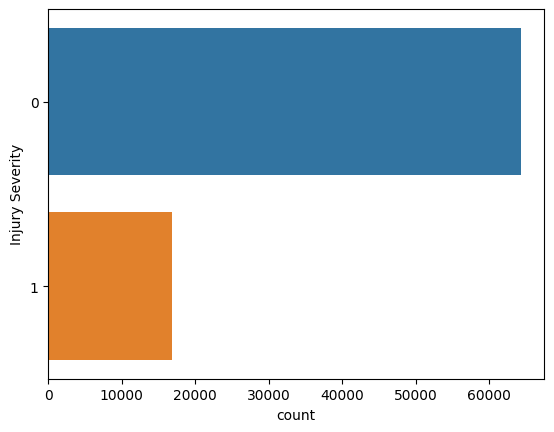

In [186]:
sns.countplot(y=df2['Injury Severity']);

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


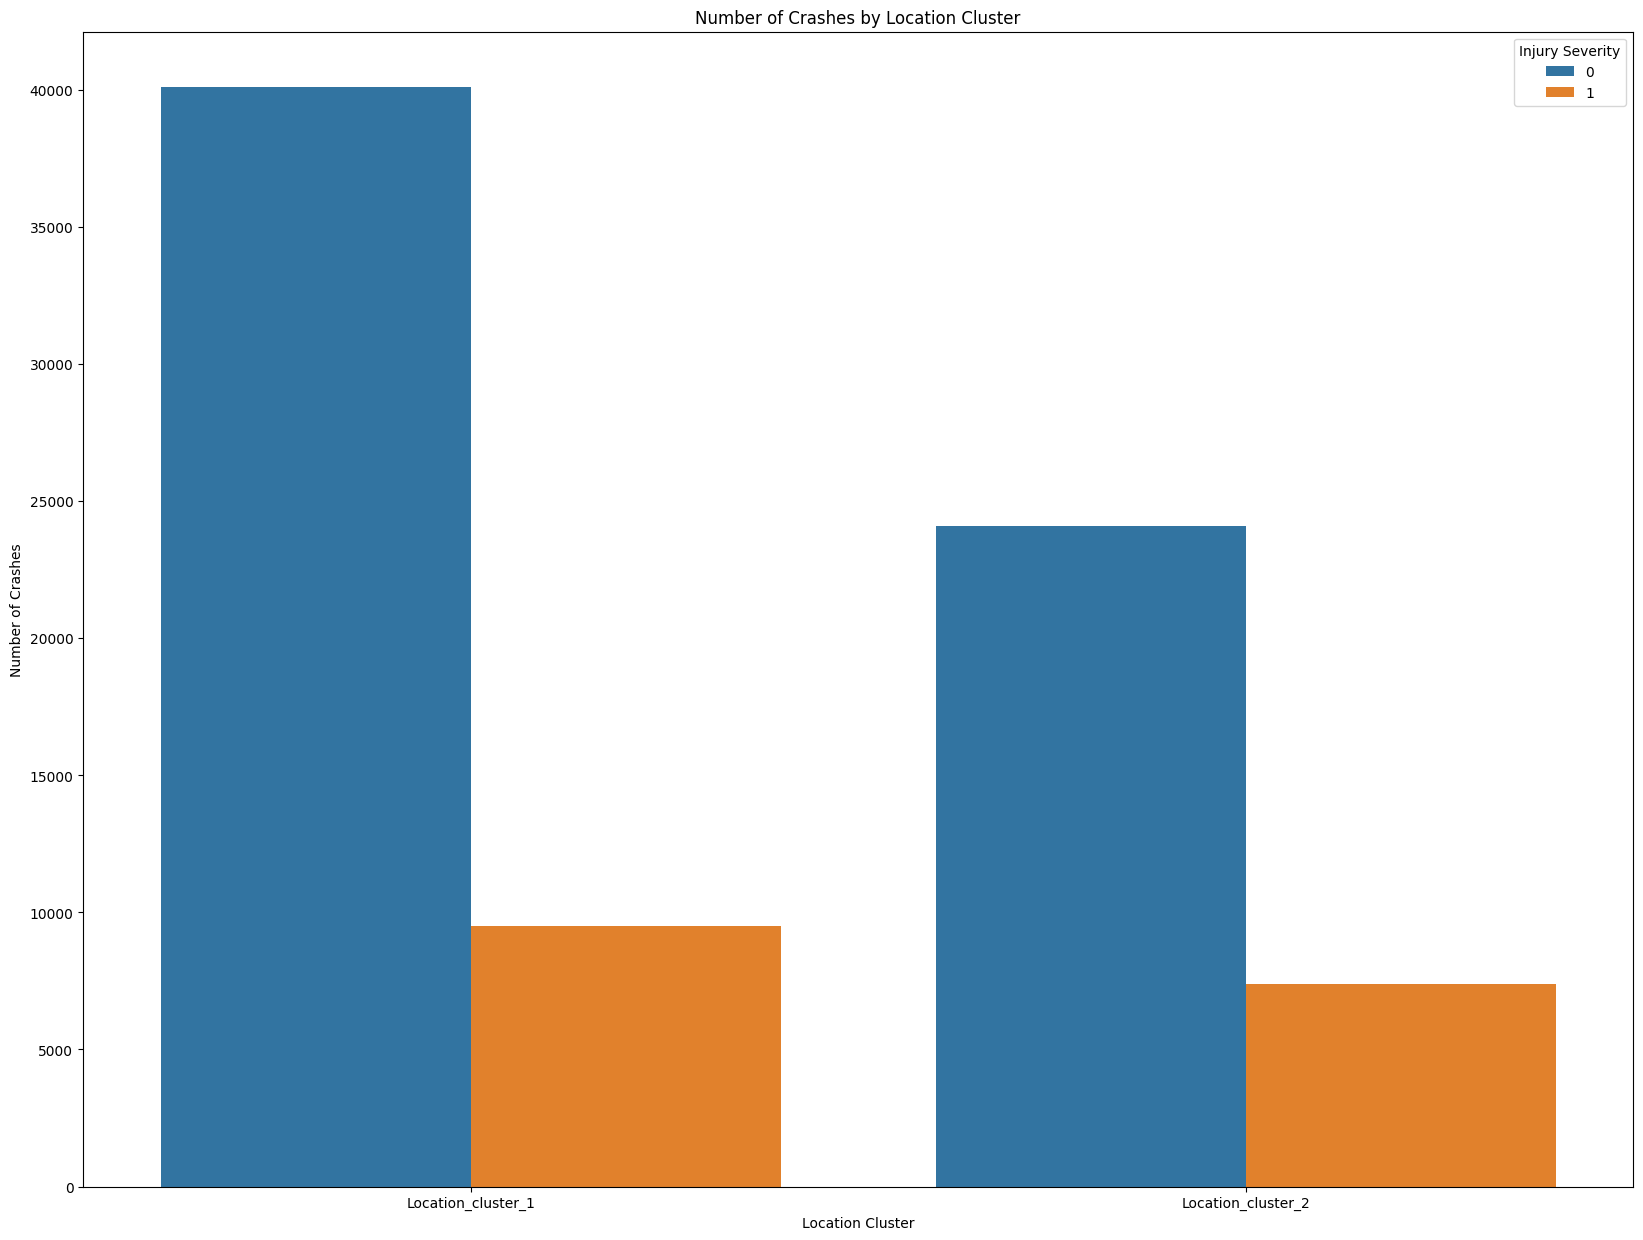

In [187]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['location_cluster'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Location Cluster')
plt.xlabel('Location Cluster')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


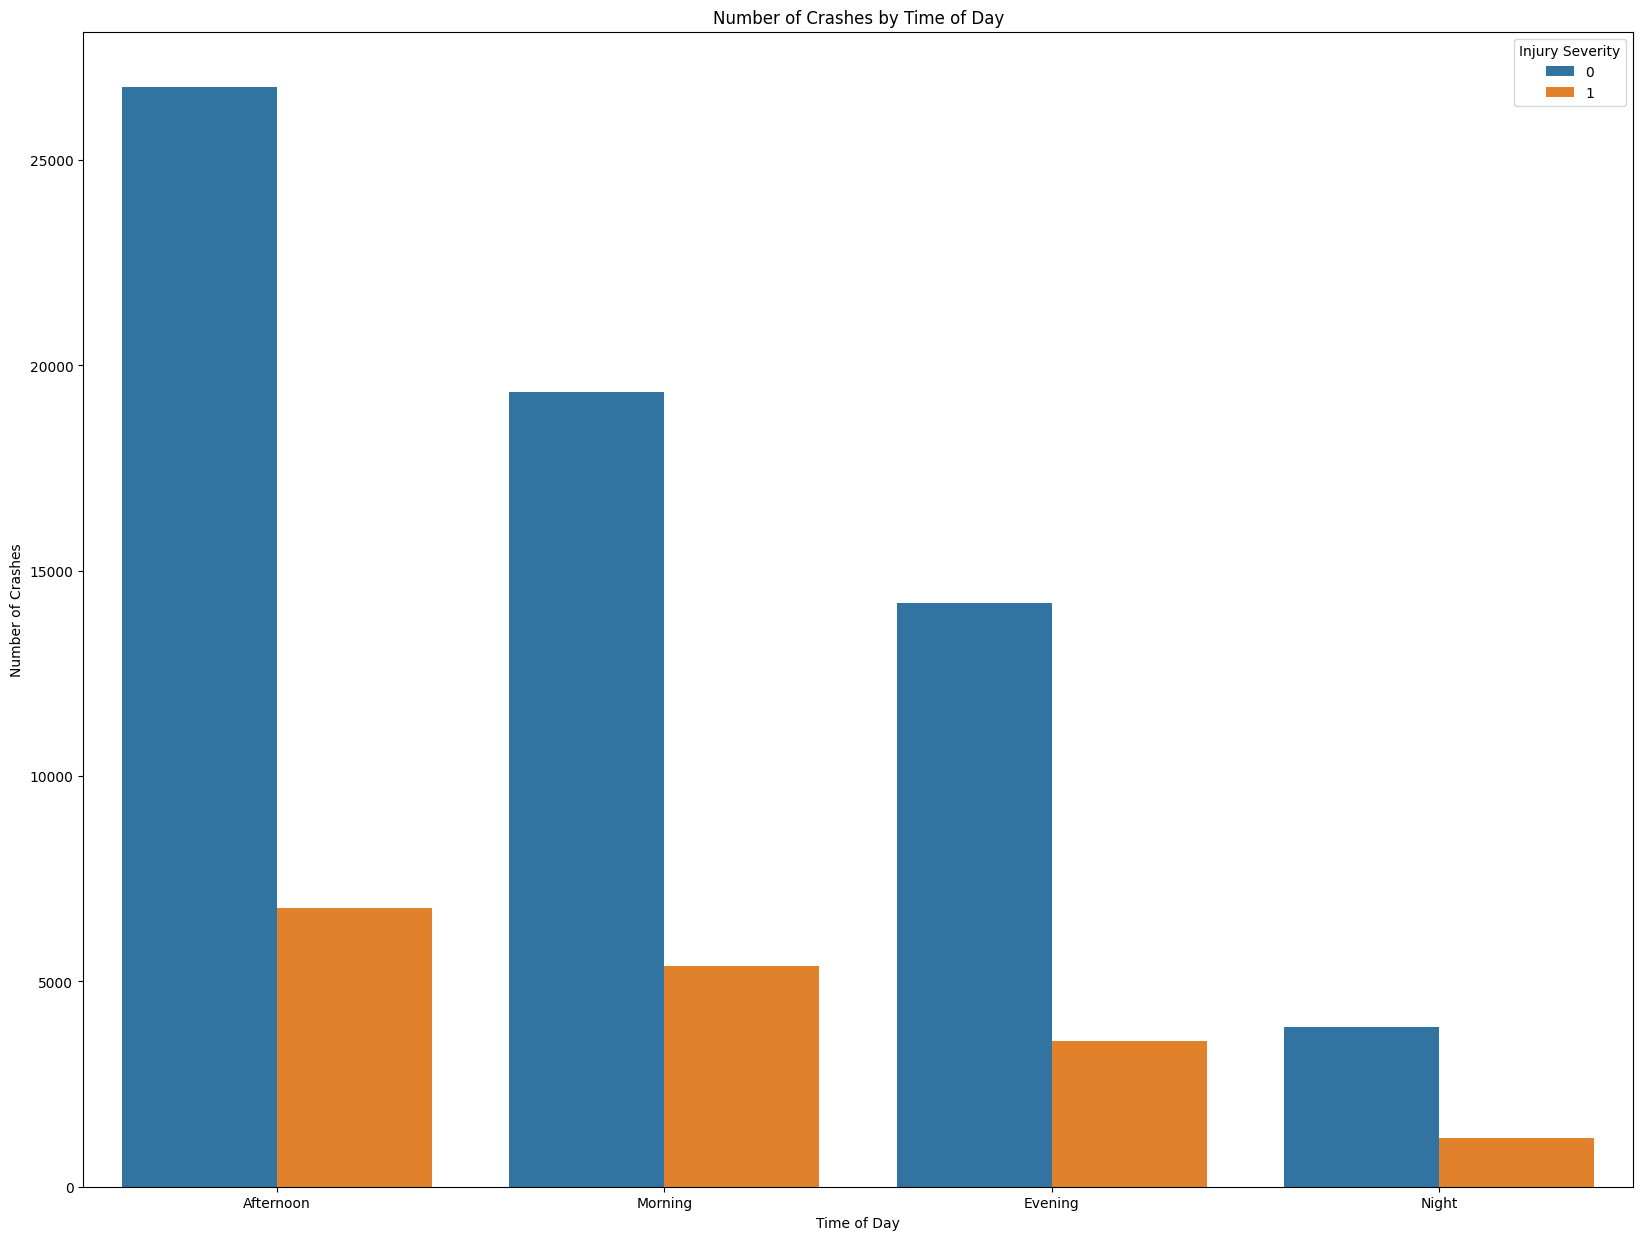

In [188]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Day'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes');


is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


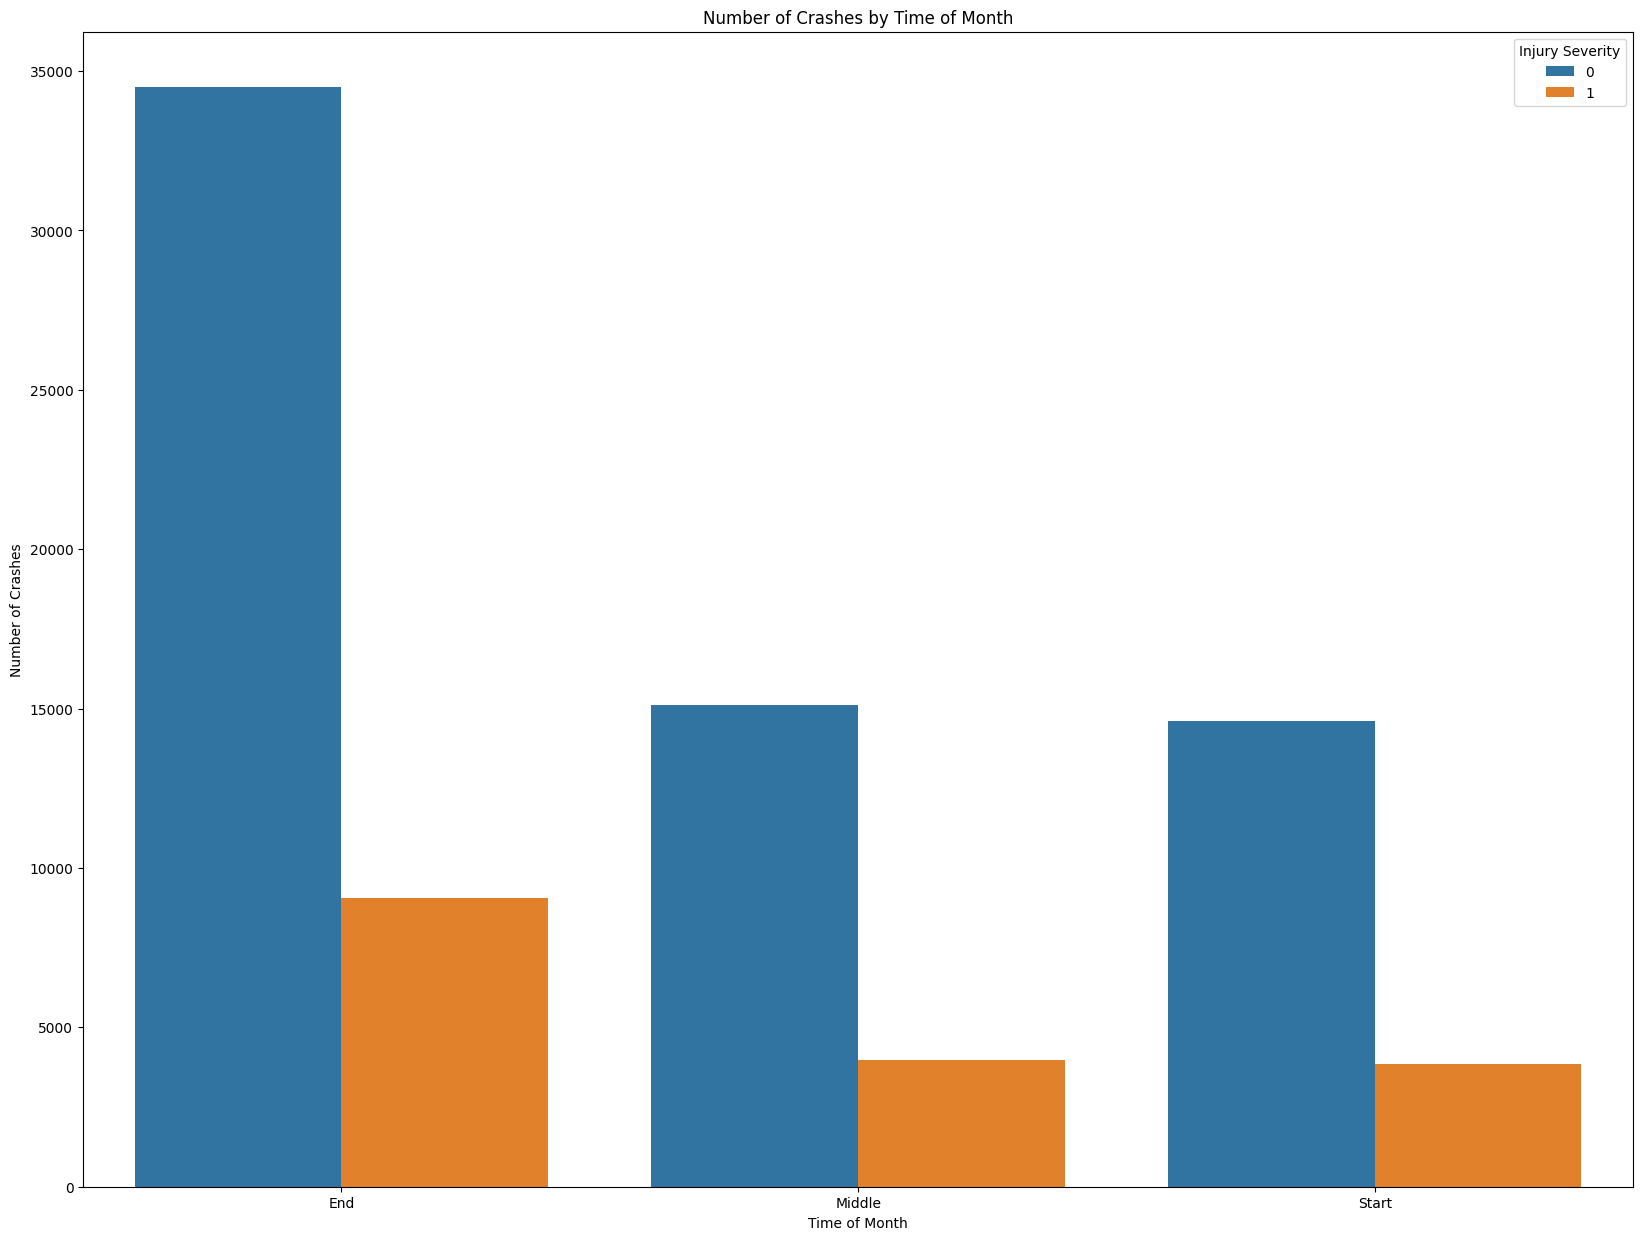

In [189]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Month'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Month')
plt.xlabel('Time of Month')
plt.ylabel('Number of Crashes');

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


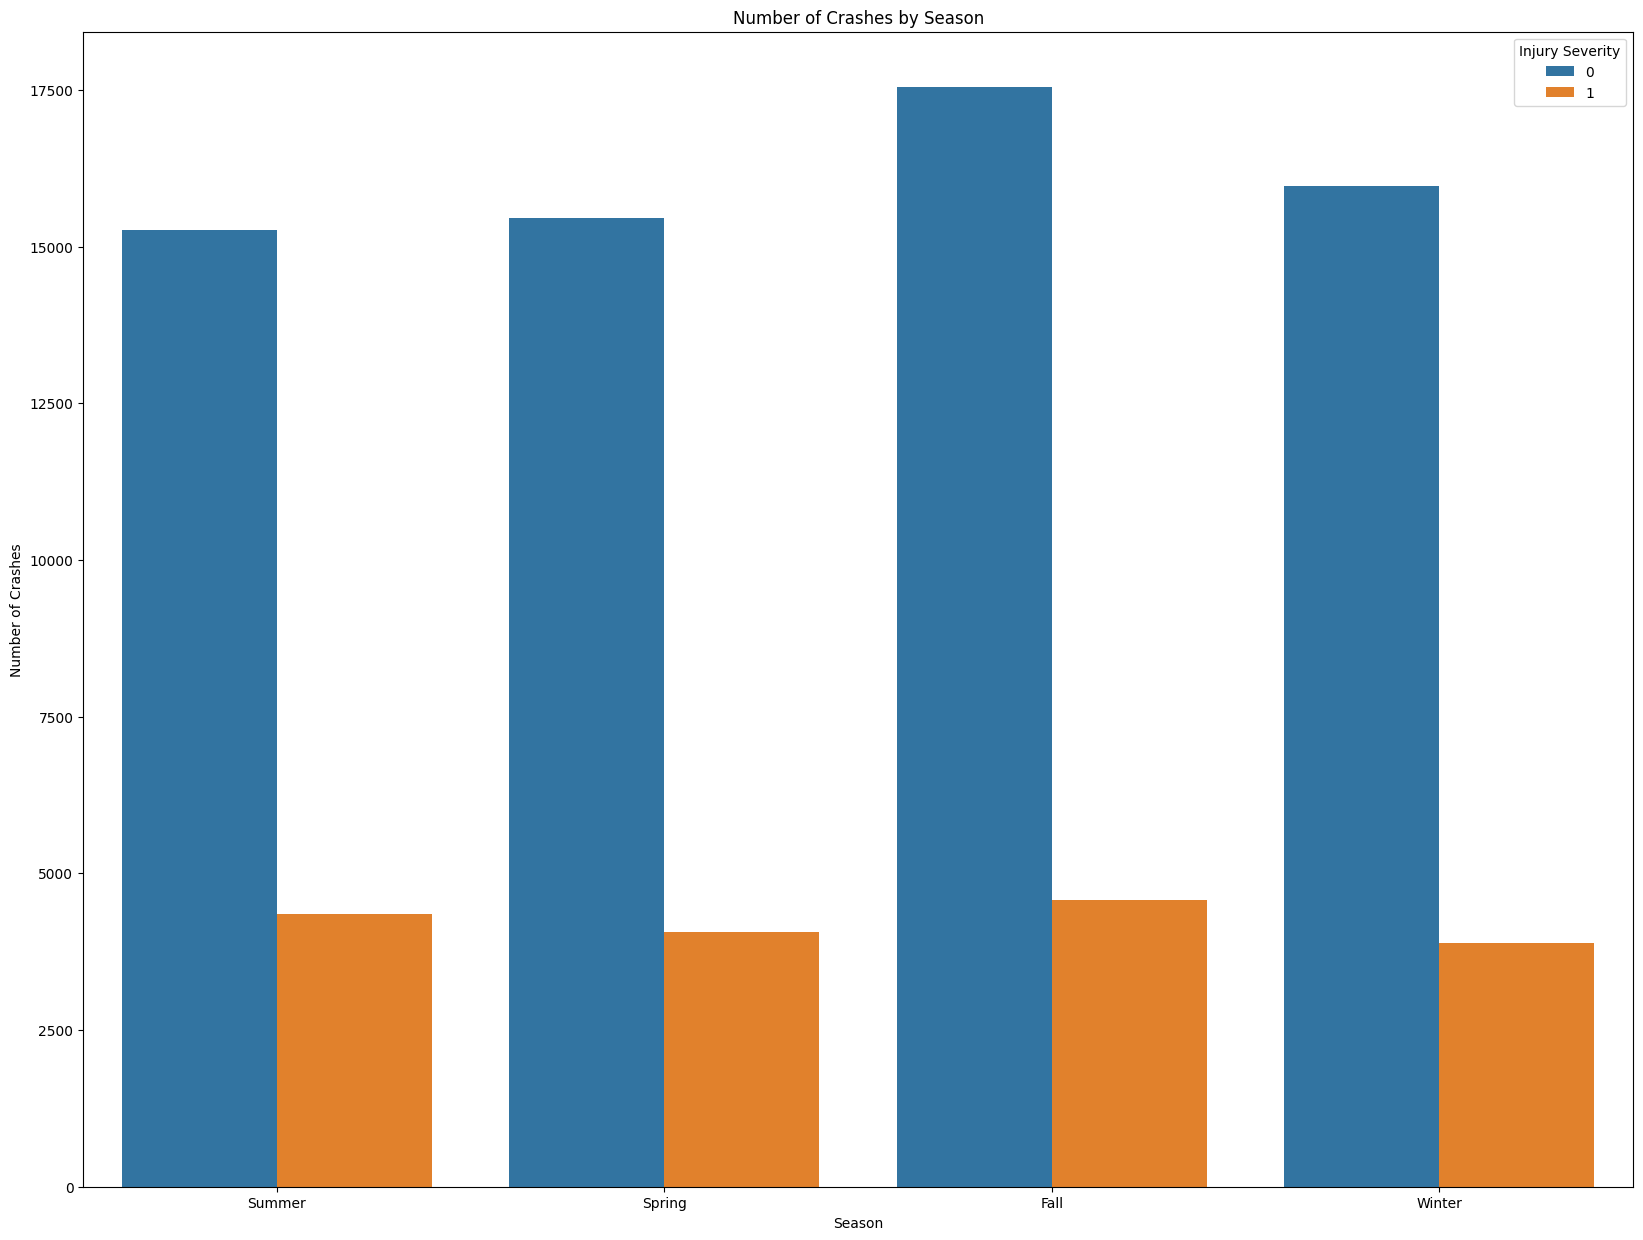

In [190]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Season'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crashes');

In [191]:
# Dummifying the categorical columns
cols_to_dummy=df2.select_dtypes(include='object').columns
df2=pd.get_dummies(df2,columns=cols_to_dummy,drop_first=True,dtype='int')

In [192]:
# Let us check the dimensioanlity of the data
df2.shape

(81123, 174)

In [193]:
X = df2.drop("Injury Severity", axis=1)
y = df2["Injury Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


## Model Selection
- We opted for two tree based algorithms because we have many observations in our dataset, and these algorithms perform well in this case
- We selected RandomForest and Extreme Gradient Descent algorithms (XGBoost)

In [194]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
print(classification_report(y_test, log_pred,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.89      0.61      0.72     12912
      Injury       0.32      0.70      0.43      3313

    accuracy                           0.63     16225
   macro avg       0.60      0.65      0.58     16225
weighted avg       0.77      0.63      0.66     16225



lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [195]:
# print coefficients and intercept for the top features in a dataframe
coef = pd.DataFrame(logreg.coef_.T, index=X_train.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


coef
Vehicle Damage Extent_SUPERFICIAL            -1.406619
Vehicle Damage Extent_FUNCTIONAL             -0.850955
Vehicle Second Impact Location_SIX OCLOCK     0.736893
Collision Type_SAME DIRECTION SIDESWIPE      -0.734213
Vehicle First Impact Location_SIX OCLOCK      0.726862
Collision Type_HEAD ON LEFT TURN              0.655423
Collision Type_SAME DIR REAR END             -0.603964
Vehicle Damage Extent_NO DAMAGE              -0.560710
Collision Type_HEAD ON                        0.536242
Vehicle Movement_MOVING CONSTANT SPEED        0.516265
Vehicle Body Type_MOTORCYCLE                  0.486959
Collision Type_STRAIGHT MOVEMENT ANGLE        0.444610
Collision Type_OTHER                         -0.350449
Vehicle Body Type_TRANSIT BUS                -0.314233
Vehicle Body Type_SCHOOL BUS                 -0.296524
Vehicle Second Impact Location_FOUR OCLOCK   -0.294329
Vehicle Movement_MAKING RIGHT TURN           -0.273014
Vehicle Second Impact Location_ONE OCLOCK    -0.268552
Vehicle First Impact Location_FOUR OCLOCK    -0.266580
Collision Type_SINGLE VEHICLE                 0.250920
Vehicle Body Type_PICKUP TRUCK               -0.234703
Vehicle First Impact Location_ONE OCLOCK     -0.227439
Vehicle Second Impact Location_ELEVEN OCLOCK -0.206207
Vehicle Second Impact Location_NINE OCLOCK    0.200163
Vehicle Movement_BACKING                     -0.194527
Vehicle First Impact Location_NINE OCLOCK     0.178232
Vehicle Second Impact Location_SEVEN OCLOCK  -0.175527
Route Type_Municipality                      -0.169191
Vehicle Damage Extent_DISABLING              -0.163283
Collision Type_SAME DIRECTION RIGHT TURN     -0.162539

In [196]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',max_depth=5)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [197]:
importances = rf_model.feature_importances_

# Sorting and displaying feature importances
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Vehicle Damage Extent_SUPERFICIAL           0.169907
Vehicle Damage Extent_DISABLING             0.137138
Collision Type_SAME DIRECTION SIDESWIPE     0.083714
Vehicle Damage Extent_FUNCTIONAL            0.069315
Vehicle First Impact Location_SIX OCLOCK    0.041240
                                              ...   
Equipment Problems_NOT STREPPED RIGHT       0.000000
Traffic Control_SCHOOL ZONE SIGN DEVICE     0.000000
Equipment Problems_FACING WRONG WAY         0.000000
Vehicle Damage Extent_OTHER                 0.000000
Vehicle Movement_DRIVERLESS MOVING VEH.     0.000000
Length: 173, dtype: float64


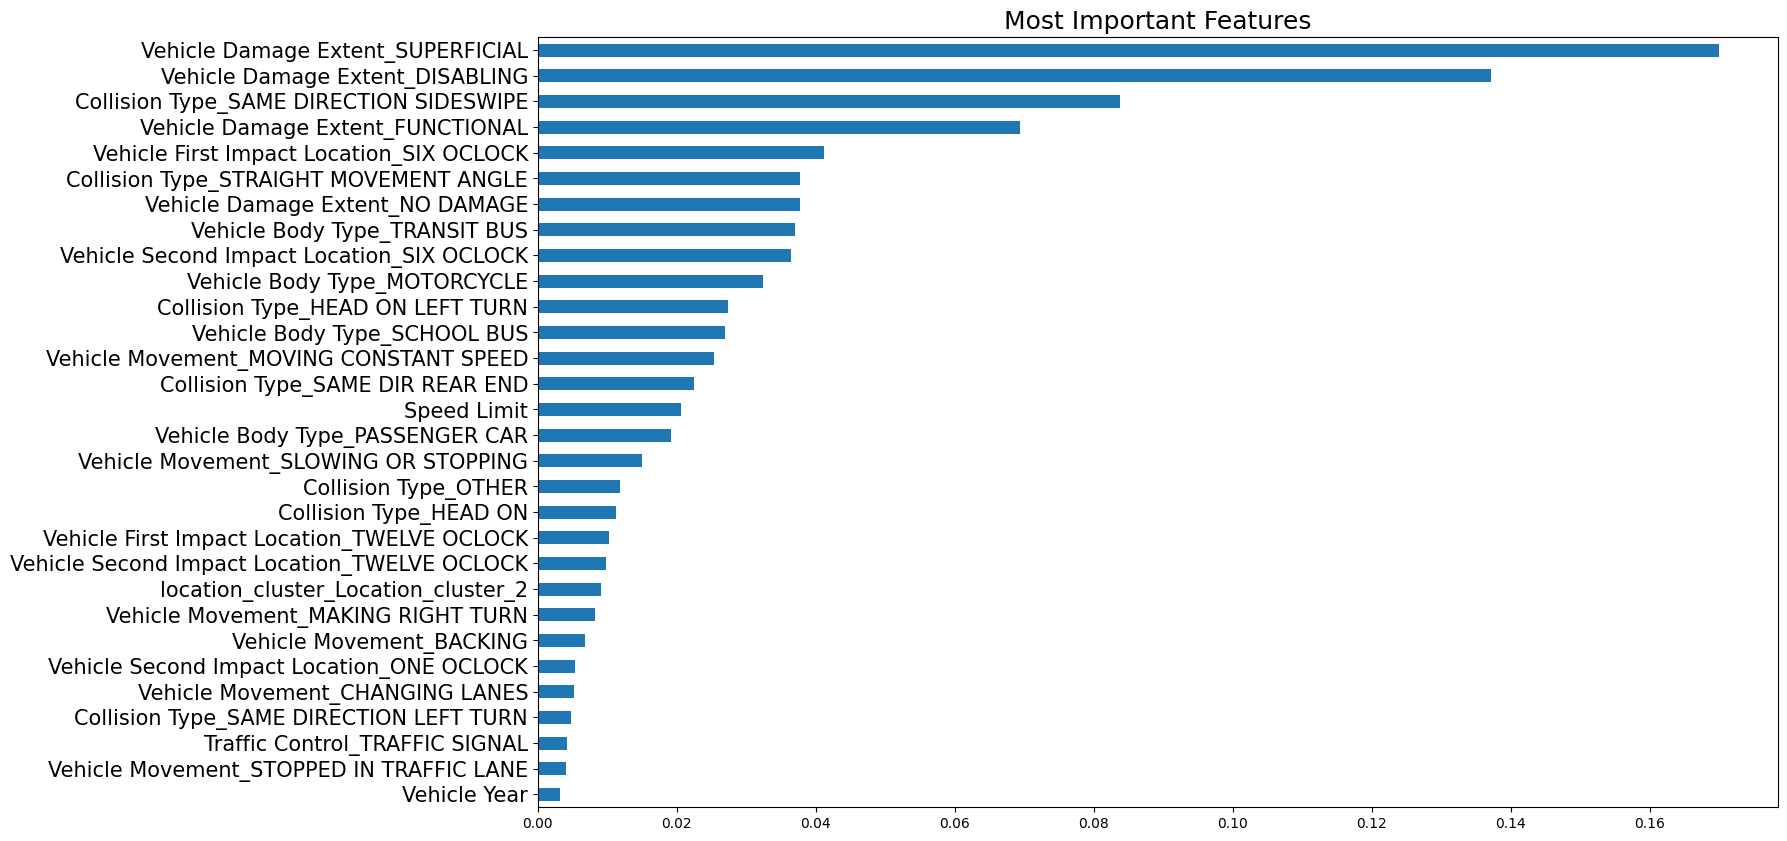

In [198]:
# Plotting the top features based on thier importance
(pd.Series(rf_model.feature_importances_, index=X.columns)
    .nlargest(30)  
    .plot(kind='barh', figsize=[16,10])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=18);

In [199]:
rfc_predictions=rf_model.predict(X_test)
print(classification_report(y_test,rfc_predictions,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.90      0.54      0.67     12912
      Injury       0.29      0.76      0.42      3313

    accuracy                           0.58     16225
   macro avg       0.59      0.65      0.55     16225
weighted avg       0.77      0.58      0.62     16225



In [200]:
# assigning weight to balance the dataset
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()



In [201]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, scale_pos_weight=scale_pos_weight,tree_method='hist')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [202]:
xgb_predictions=xgb_model.predict(X_test)
print(classification_report(y_test,xgb_predictions,target_names=['No Injury','Injury']))    

              precision    recall  f1-score   support

   No Injury       0.90      0.63      0.74     12912
      Injury       0.33      0.71      0.45      3313

    accuracy                           0.65     16225
   macro avg       0.61      0.67      0.60     16225
weighted avg       0.78      0.65      0.68     16225



In [203]:

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

xgb_metrics = {metric_name: metric_func(y_test, xgb_predictions) for metric_name, metric_func in metrics.items()}
rfc_metrics = {metric_name: metric_func(y_test, rfc_predictions) for metric_name, metric_func in metrics.items()}
log_metrics = {metric_name: metric_func(y_test, log_pred) for metric_name, metric_func in metrics.items()}  # Added this

# Create dataframe
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'Random Forest': rfc_metrics,
    'Logistic Regression': log_metrics  # Added this
})

comparison_df



XGBoost  Random Forest  Logistic Regression
Accuracy   0.647827       0.580216             0.629029
Precision  0.331698       0.294429             0.315366
Recall     0.714156       0.756112             0.697555
F1 Score   0.452996       0.423822             0.434358
ROC AUC    0.672482       0.645598             0.654501

## Resampling Method to Improve Model Performance
- The model seems to be biased towards the positive class--that is, it is very sensitive to the positive class and correctly classifies it for the most part. However, it is also misclassifying many negative instances. While this may be beneficial in the sense that emergency units will be aptly dispatched to incidents that are most emergent, it may also lead to subobtimal allocations. 
- We  believe this problem is stemming from the weights we used to address class imbalance in the dataset. 
- To address this, we will try undersampling the negative class. This approach seems viable because we have a relatively large dataset; therefore, we can make do with losing some observations while also improving training speed and performance

In [204]:

df_minority = df2[df2['Injury Severity']==1]
df_majority = df2[df2['Injury Severity']==0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42) 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled['Injury Severity'].value_counts()


Injury Severity
0    16893
1    16893
Name: count, dtype: int64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


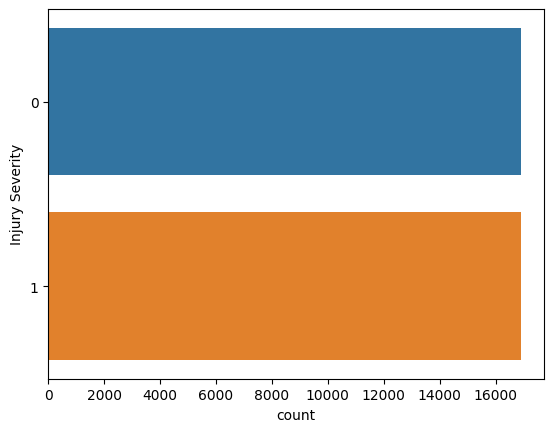

In [205]:
sns.countplot(y=df_downsampled['Injury Severity']);

In [206]:
X2 = df_downsampled.drop("Injury Severity", axis=1)
y2 = df_downsampled["Injury Severity"]
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X2, y2, test_size=0.20, random_state=42)

In [207]:
logreg_us = LogisticRegression(max_iter=10000)
logreg_us.fit(X_train_us, y_train_us)
log_pred_us = logreg_us.predict(X_test_us)
print(classification_report(y_test_us, log_pred_us,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.68      0.65      0.66      3384
      Injury       0.66      0.69      0.68      3374

    accuracy                           0.67      6758
   macro avg       0.67      0.67      0.67      6758
weighted avg       0.67      0.67      0.67      6758



In [208]:
coef = pd.DataFrame(logreg_us.coef_.T, index=X_train_us.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(40)


coef
Vehicle Damage Extent_NO DAMAGE                    -2.564932
Vehicle Damage Extent_SUPERFICIAL                  -2.498621
Vehicle Damage Extent_FUNCTIONAL                   -2.082794
Vehicle Body Type_MOTORCYCLE                        1.845729
Vehicle Damage Extent_DISABLING                    -1.183631
Collision Type_HEAD ON                              1.066731
Vehicle Body Type_SCHOOL BUS                       -1.028667
Vehicle Movement_BACKING                           -1.013941
Vehicle Body Type_TRANSIT BUS                      -0.887224
Vehicle Second Impact Location_SIX OCLOCK           0.710232
Collision Type_SAME DIRECTION SIDESWIPE            -0.692347
Vehicle First Impact Location_SIX OCLOCK            0.673065
Vehicle Body Type_PICKUP TRUCK                     -0.569682
Vehicle Body Type_MEDIUM/HEAVY TRUCKS 3 AXLES (... -0.483220
Vehicle Body Type_OTHER LIGHT TRUCKS (10,000LBS... -0.435231
Collision Type_SAME DIR REAR END                   -0.427951
Vehicle Movement_MOVING CONSTANT SPEED              0.382966
Collision Type_SAME DIRECTION RIGHT TURN           -0.381164
Vehicle Body Type_POLICE VEHICLE/NON EMERGENCY     -0.357474
Collision Type_SAME DIRECTION LEFT TURN            -0.349686
Collision Type_HEAD ON LEFT TURN                    0.346501
Vehicle Body Type_CARGO VAN/LIGHT TRUCK 2 AXLES... -0.345746
Vehicle Second Impact Location_NINE OCLOCK          0.321717
Vehicle Body Type_MOPED                             0.319832
Vehicle Second Impact Location_FOUR OCLOCK         -0.310988
Collision Type_ANGLE MEETS LEFT TURN                0.298201
Collision Type_STRAIGHT MOVEMENT ANGLE              0.292798
Vehicle Second Impact Location_ROOF TOP             0.291538
Cross-Street Type_US (State)                       -0.280087
Vehicle Body Type_VAN                              -0.266411
Vehicle Second Impact Location_ELEVEN OCLOCK       -0.262187
Collision Type_SAME DIR BOTH LEFT TURN             -0.259900
Vehicle First Impact Location_TWELVE OCLOCK        -0.256132
Vehicle Second Impact Location_FIVE OCLOCK         -0.252329
Collision Type_OTHER                               -0.250623
Cross-Street Type_Government                        0.247174
Vehicle Second Impact Location_UNDERSIDE           -0.241007
Vehicle Movement_SKIDDING                           0.239849
Route Type_Municipality                            -0.231591
Vehicle First Impact Location_TEN OCLOCK            0.227757

In [209]:
# Creating and training the Random Forest model on undersampled data
rf_model_us = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=11, n_estimators=450, random_state=42)

In [210]:
# Feature Importance
feature_importances_us = pd.Series(rf_model_us.feature_importances_, index=X_train_us.columns).sort_values(ascending=False)
print(feature_importances_us)

Vehicle Damage Extent_SUPERFICIAL            0.136494
Vehicle Damage Extent_DISABLING              0.075180
Vehicle Damage Extent_FUNCTIONAL             0.060021
Collision Type_SAME DIRECTION SIDESWIPE      0.048373
Vehicle Second Impact Location_SIX OCLOCK    0.038698
                                               ...   
Equipment Problems_SIZE/TYPE IMPROPER        0.000003
Equipment Problems_STRAP/TETHER LOOSE        0.000003
Traffic Control_SCHOOL ZONE SIGN DEVICE      0.000000
Vehicle Body Type_FARM VEHICLE               0.000000
Equipment Problems_FACING WRONG WAY          0.000000
Length: 173, dtype: float64


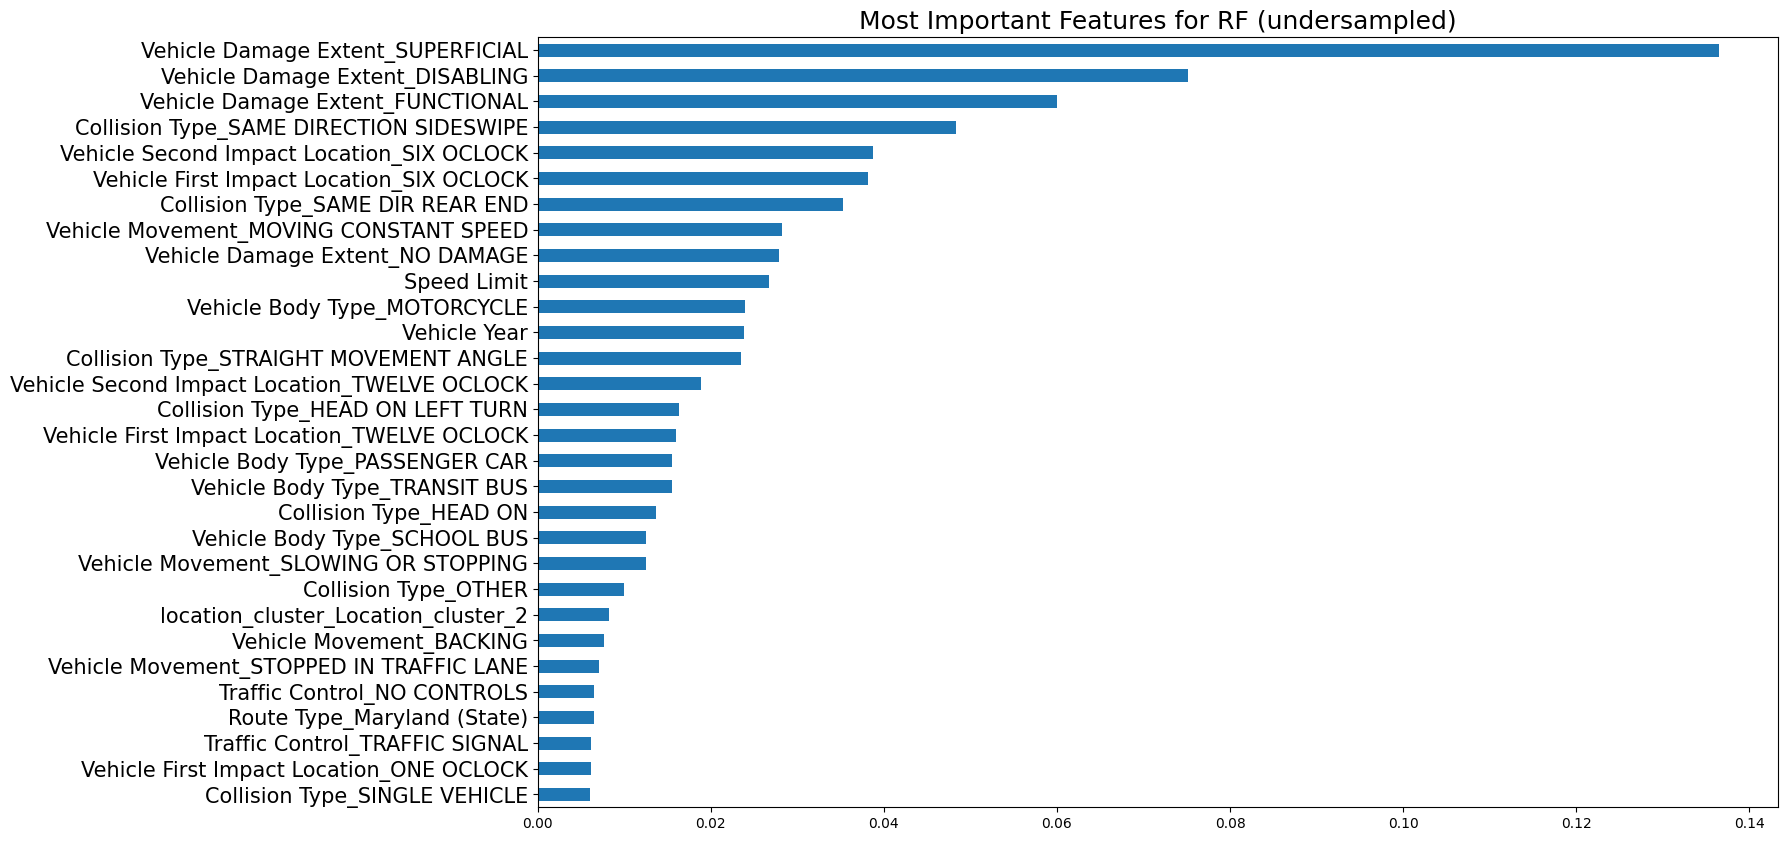

In [211]:
# Plot
feature_importances_us.nlargest(30).plot(kind='barh', figsize=[16,10]).invert_yaxis()
plt.yticks(size=15)
plt.title('Most Important Features for RF (undersampled)', size=18)
plt.show()

In [212]:
# Predictions
rfc_predictions_us = rf_model_us.predict(X_test_us)
print(classification_report(y_test_us, rfc_predictions_us,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.71      0.56      0.62      3384
      Injury       0.63      0.77      0.69      3374

    accuracy                           0.66      6758
   macro avg       0.67      0.66      0.66      6758
weighted avg       0.67      0.66      0.66      6758



In [213]:
# Creating and training the XGBoost model on undersampled data
xgb_model_us = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_us.fit(X_train_us, y_train_us)

# Predictions
xgb_predictions_us = xgb_model_us.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us, target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.70      0.62      0.65      3384
      Injury       0.65      0.73      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.68      0.67      0.67      6758
weighted avg       0.68      0.67      0.67      6758



In [214]:
feature_importances_us = pd.DataFrame(xgb_model_us.feature_importances_, index=X_train_us.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_us.head(50)

importance
Vehicle First Impact Location_SIX OCLOCK              0.084122
Vehicle Damage Extent_SUPERFICIAL                     0.077479
Vehicle Damage Extent_NO DAMAGE                       0.067323
Vehicle Second Impact Location_SIX OCLOCK             0.059414
Collision Type_SAME DIRECTION SIDESWIPE               0.038314
Vehicle Damage Extent_FUNCTIONAL                      0.037836
Vehicle Body Type_MOTORCYCLE                          0.029395
Vehicle Damage Extent_DISABLING                       0.020129
Collision Type_SAME DIR REAR END                      0.019801
Collision Type_HEAD ON                                0.019147
Vehicle Movement_BACKING                              0.018947
Collision Type_HEAD ON LEFT TURN                      0.013501
Vehicle Body Type_SCHOOL BUS                          0.011548
Vehicle Movement_MOVING CONSTANT SPEED                0.010622
Vehicle Second Impact Location_TEN OCLOCK             0.010277
Vehicle Second Impact Location_NINE OCLOCK            0.009806
Vehicle First Impact Location_ONE OCLOCK              0.009220
Collision Type_STRAIGHT MOVEMENT ANGLE                0.008743
Traffic Control_YIELD SIGN                            0.008238
Vehicle Body Type_TRANSIT BUS                         0.007730
Vehicle First Impact Location_TWELVE OCLOCK           0.007466
Vehicle Second Impact Location_FOUR OCLOCK            0.007433
Route Type_Government                                 0.007186
Vehicle Body Type_PASSENGER CAR                       0.007051
Vehicle Body Type_MOPED                               0.006623
Vehicle First Impact Location_TEN OCLOCK              0.006383
Collision Type_ANGLE MEETS RIGHT TURN                 0.006290
Collision Type_SAME DIRECTION RIGHT TURN              0.006225
Vehicle First Impact Location_FIVE OCLOCK             0.006099
Light_DARK NO LIGHTS                                  0.005652
Surface Condition_SNOW                                0.005570
Vehicle Second Impact Location_TWELVE OCLOCK          0.005429
Collision Type_SAME DIRECTION LEFT TURN               0.005373
Vehicle Body Type_POLICE VEHICLE/EMERGENCY            0.005167
Collision Type_ANGLE MEETS LEFT TURN                  0.005110
Vehicle Movement_SLOWING OR STOPPING                  0.005063
Vehicle Body Type_OTHER LIGHT TRUCKS (10,000LBS...    0.005014
Traffic Control_OTHER                                 0.004829
Vehicle First Impact Location_FOUR OCLOCK             0.004819
Route Type_Municipality                               0.004796
Collision Type_SINGLE VEHICLE                         0.004770
Vehicle Movement_STOPPED IN TRAFFIC LANE              0.004762
Vehicle Second Impact Location_THREE OCLOCK           0.004752
Vehicle Body Type_PICKUP TRUCK                        0.004714
Collision Type_OTHER                                  0.004685
Vehicle Second Impact Location_SEVEN OCLOCK           0.004637
Vehicle First Impact Location_THREE OCLOCK            0.004637
Modified Conditions_Other                             0.004554
Route Type_Ramp                                       0.004533
Vehicle Movement_MAKING RIGHT TURN                    0.004471

In [215]:
# Removing features with zero importance
unused_features = list(feature_importances_us[feature_importances_us['importance'] == 0].index)
print(unused_features)

['Traffic Control_RAILWAY CROSSING DEVICE', 'Vehicle Body Type_LIMOUSINE', 'Surface Condition_WATER(STANDING/MOVING)', 'Vehicle Movement_DRIVERLESS MOVING VEH.', 'Vehicle Body Type_FIRE VEHICLE/NON EMERGENCY', 'Modified Conditions_WET', 'Surface Condition_SAND', 'Traffic Control_SCHOOL ZONE SIGN DEVICE', 'Equipment Problems_STRAP/TETHER LOOSE', 'Equipment Problems_SIZE/TYPE IMPROPER', 'Vehicle Body Type_AUTOCYCLE', 'Equipment Problems_NOT STREPPED RIGHT', 'Equipment Problems_FACING WRONG WAY', 'Equipment Problems_BELT(S) MISUSED', 'Surface Condition_OIL', 'Vehicle Body Type_FARM VEHICLE', 'Surface Condition_MUD, DIRT, GRAVEL', 'Vehicle Body Type_LOW SPEED VEHICLE', 'Vehicle Body Type_CROSS COUNTRY BUS', 'Vehicle Body Type_ALL TERRAIN VEHICLE (ATV)', 'Route Type_Service Road', 'Vehicle Movement_RIGHT TURN ON RED', 'Cross-Street Type_Interstate (State)', 'Equipment Problems_BELTS/ANCHORS BROKE']


In [216]:
X_train_us.drop(unused_features, axis=1, inplace=True)
X_test_us.drop(unused_features, axis=1, inplace=True)

In [217]:
# same xgboost most without the features with zero importance
xgb_model_us_2 = XGBClassifier(n_estimators=200, random_state=42, max_depth=5, tree_method='hist', max_bin=800, alpha=0.3, learning_rate=0.15)
xgb_model_us_2.fit(X_train_us, y_train_us)
xgb_predictions_us_2 = xgb_model_us_2.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us_2, target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.70      0.62      0.65      3384
      Injury       0.65      0.73      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.68      0.67      0.67      6758
weighted avg       0.68      0.67      0.67      6758



In [218]:
feature_importances_us_2 = pd.DataFrame(xgb_model_us_2.feature_importances_, index=X_train_us.columns, columns=['importance']).sort_values('importance', ascending=False)
feature_importances_us_2.head(30)

importance
Vehicle First Impact Location_SIX OCLOCK       0.084122
Vehicle Damage Extent_SUPERFICIAL              0.077479
Vehicle Damage Extent_NO DAMAGE                0.067323
Vehicle Second Impact Location_SIX OCLOCK      0.059414
Collision Type_SAME DIRECTION SIDESWIPE        0.038314
Vehicle Damage Extent_FUNCTIONAL               0.037836
Vehicle Body Type_MOTORCYCLE                   0.029395
Vehicle Damage Extent_DISABLING                0.020129
Collision Type_SAME DIR REAR END               0.019801
Collision Type_HEAD ON                         0.019147
Vehicle Movement_BACKING                       0.018947
Collision Type_HEAD ON LEFT TURN               0.013501
Vehicle Body Type_SCHOOL BUS                   0.011548
Vehicle Movement_MOVING CONSTANT SPEED         0.010622
Vehicle Second Impact Location_TEN OCLOCK      0.010277
Vehicle Second Impact Location_NINE OCLOCK     0.009806
Vehicle First Impact Location_ONE OCLOCK       0.009220
Collision Type_STRAIGHT MOVEMENT ANGLE         0.008743
Traffic Control_YIELD SIGN                     0.008238
Vehicle Body Type_TRANSIT BUS                  0.007730
Vehicle First Impact Location_TWELVE OCLOCK    0.007466
Vehicle Second Impact Location_FOUR OCLOCK     0.007433
Route Type_Government                          0.007186
Vehicle Body Type_PASSENGER CAR                0.007051
Vehicle Body Type_MOPED                        0.006623
Vehicle First Impact Location_TEN OCLOCK       0.006383
Collision Type_ANGLE MEETS RIGHT TURN          0.006290
Collision Type_SAME DIRECTION RIGHT TURN       0.006225
Vehicle First Impact Location_FIVE OCLOCK      0.006099
Light_DARK NO LIGHTS                           0.005652

In [219]:
# Metrics definition
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

# Metric Calculation Functions
def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

# Calculate metrics
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)

# Comparative Dataframe for organized presentation
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us
})

comparison_df



XGBoost  XGBoost (undersampled)  Random Forest  \
Accuracy   0.647827                0.672684       0.580216   
Precision  0.331698                0.654275       0.294429   
Recall     0.714156                0.730290       0.756112   
F1 Score   0.452996                0.690196       0.423822   

           Random Forest (undersampled)  Logistic Regression  \
Accuracy                       0.660994             0.629029   
Precision                      0.632299             0.315366   
Recall                         0.767042             0.697555   
F1 Score                       0.693183             0.434358   

           Logistic Regression (undersampled)  
Accuracy                             0.668097  
Precision                            0.660153  
Recall                               0.690871  
F1 Score                             0.675163

In [220]:
# 
#df_majority_upsampled = resample(df_minority, 
                                 #replace=True,     # sample with replacement
                                # n_samples=len(df_majority),    # to match majority class
                                # random_state=42)
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([df_majority_upsampled, df_majority])
#df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
#df_upsampled['Injury Severity'].value_counts()


X3 = df2.drop('Injury Severity', axis=1)
y3 = df2['Injury Severity']
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X3, y3, test_size=0.20, random_state=42)


df_train = pd.concat([X_train_os, y_train_os], axis=1)


df_majority = df_train[df_train['Injury Severity'] == 0]  
df_minority = df_train[df_train['Injury Severity'] == 1]  

# Upsample the minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)  


df_train_upsampled = pd.concat([df_majority, df_minority_upsampled])


df_train_upsampled = df_train_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)


X_train_os = df_train_upsampled.drop('Injury Severity', axis=1)
y_train_os = df_train_upsampled['Injury Severity']

df_train_upsampled['Injury Severity'].value_counts()




Injury Severity
0    51318
1    51318
Name: count, dtype: int64

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead


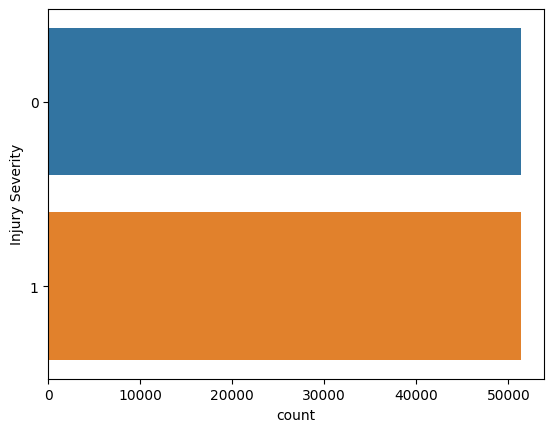

In [221]:
sns.countplot(y=df_train_upsampled['Injury Severity']);

In [222]:
#X3 = df_upsampled.drop("Injury Severity", axis=1)
#y3 = df_upsampled["Injury Severity"]
#X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X3, y3, test_size=0.33, random_state=42)


In [223]:
logreg_os = LogisticRegression(max_iter=10000)
logreg_os.fit(X_train_os, y_train_os)
log_pred_os = logreg_os.predict(X_test_os)
print(classification_report(y_test_os, log_pred_os,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.89      0.63      0.74     12912
      Injury       0.33      0.70      0.45      3313

    accuracy                           0.64     16225
   macro avg       0.61      0.67      0.59     16225
weighted avg       0.78      0.64      0.68     16225



In [224]:
coef = pd.DataFrame(logreg_os.coef_.T, index=X_train_os.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)   


coef
Vehicle Damage Extent_SUPERFICIAL                  -2.151248
Vehicle Damage Extent_FUNCTIONAL                   -1.656729
Vehicle Damage Extent_NO DAMAGE                    -1.479577
Vehicle Body Type_MOTORCYCLE                        1.070067
Collision Type_HEAD ON                              0.938274
Collision Type_SAME DIRECTION SIDESWIPE            -0.780169
Vehicle Damage Extent_DISABLING                    -0.777986
Vehicle First Impact Location_SIX OCLOCK            0.652278
Vehicle Second Impact Location_SIX OCLOCK           0.650971
Vehicle Body Type_SCHOOL BUS                       -0.623163
Vehicle Body Type_TRANSIT BUS                      -0.563288
Vehicle Movement_BACKING                           -0.509151
Vehicle Second Impact Location_FOUR OCLOCK         -0.494547
Vehicle Body Type_PICKUP TRUCK                     -0.481349
Vehicle Movement_MOVING CONSTANT SPEED              0.458779
Collision Type_OTHER                               -0.449906
Collision Type_SAME DIR REAR END                   -0.436190
Vehicle First Impact Location_FOUR OCLOCK          -0.430685
Vehicle Movement_MAKING RIGHT TURN                 -0.429729
Collision Type_HEAD ON LEFT TURN                    0.357750
Collision Type_STRAIGHT MOVEMENT ANGLE              0.323208
Collision Type_ANGLE MEETS LEFT TURN                0.284806
Vehicle Body Type_CARGO VAN/LIGHT TRUCK 2 AXLES... -0.282011
Collision Type_SAME DIRECTION RIGHT TURN           -0.264129
Vehicle First Impact Location_TWELVE OCLOCK        -0.255708
Vehicle Body Type_MEDIUM/HEAVY TRUCKS 3 AXLES (... -0.254843
Vehicle Body Type_OTHER LIGHT TRUCKS (10,000LBS... -0.246228
Collision Type_SAME DIRECTION LEFT TURN            -0.241172
Vehicle Second Impact Location_FIVE OCLOCK         -0.232505
Vehicle Second Impact Location_NINE OCLOCK          0.224574

In [225]:
rf_model_os = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_os.fit(X_train_os, y_train_os)
rfc_predictions_os = rf_model_os.predict(X_test_os)
print(classification_report(y_test_os, rfc_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.91      0.56      0.70     12912
      Injury       0.31      0.78      0.45      3313

    accuracy                           0.61     16225
   macro avg       0.61      0.67      0.57     16225
weighted avg       0.79      0.61      0.65     16225



In [226]:
xgb_model_os = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_os.fit(X_train_os, y_train_os)
xgb_predictions_os = xgb_model_os.predict(X_test_os)
print(classification_report(y_test_os, xgb_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.89      0.64      0.75     12912
      Injury       0.33      0.70      0.45      3313

    accuracy                           0.65     16225
   macro avg       0.61      0.67      0.60     16225
weighted avg       0.78      0.65      0.69     16225



In [227]:
# compare metrics of all nine models in a  dataframe
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os
})

comparison_df

XGBoost  XGBoost (undersampled)  XGBoost (oversampled)  \
Accuracy   0.647827                0.672684               0.653559   
Precision  0.331698                0.654275               0.334291   
Recall     0.714156                0.730290               0.702686   
F1 Score   0.452996                0.690196               0.453051   

           Random Forest  Random Forest (undersampled)  \
Accuracy        0.580216                      0.660994   
Precision       0.294429                      0.632299   
Recall          0.756112                      0.767042   
F1 Score        0.423822                      0.693183   

           Random Forest (oversampled)  Logistic Regression  \
Accuracy                      0.607581             0.629029   
Precision                     0.313553             0.315366   
Recall                        0.775128             0.697555   
F1 Score                      0.446492             0.434358   

           Logistic Regression (undersampled)  \
Accuracy                             0.668097   
Precision                            0.660153   
Recall                               0.690871   
F1 Score                             0.675163   

           Logistic Regression (oversampled)  
Accuracy                            0.644006  
Precision                           0.326671  
Recall                              0.700573  
F1 Score                            0.445575

In [228]:
#print xgb feature importance
feature_importances = pd.DataFrame(xgb_model_os.feature_importances_, index = X_train_os.columns, columns=['importance']).sort_values('importance',ascending=False)
#pd.set_option('display.max_rows', None)
feature_importances

importance
Vehicle First Impact Location_SIX OCLOCK     0.100223
Vehicle Damage Extent_NO DAMAGE              0.061618
Vehicle Damage Extent_SUPERFICIAL            0.057910
Vehicle Damage Extent_FUNCTIONAL             0.048112
Vehicle Second Impact Location_SIX OCLOCK    0.032702
...                                               ...
Equipment Problems_SIZE/TYPE IMPROPER        0.000000
Equipment Problems_BELT(S) MISUSED           0.000000
Equipment Problems_NOT STREPPED RIGHT        0.000000
Equipment Problems_NO MISUSE                 0.000000
Route Type_Service Road                      0.000000

[173 rows x 1 columns]

In [229]:

X4 = df2.drop('Injury Severity', axis=1)  # features
y4 = df2['Injury Severity']                # target variable


#smote = SMOTE(random_state=42)


#X_resampled, y_resampled = smote.fit_resample(X4, y4)

# Combine the resampled features and target into a new DataFrame
#df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
#df_resampled['Injury Severity'] = y_resampled

# Shuffle the DataFrame 
#df_resampled = df_resampled.sample(frac=1, random_state=42).reset_index(drop=True)


#df_resampled['Injury Severity'].value_counts()

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X4, y4, test_size=0.20, random_state=42)

# Initialize SMOTE
smote = SMOTE(random_state=42)

X_train_sm_resampled, y_train_sm_resampled = smote.fit_resample(X_train_sm, y_train_sm)

df_train_resampled = pd.DataFrame(X_train_sm_resampled, columns=X_train_sm.columns)
df_train_resampled['Injury Severity'] = y_train_sm_resampled

df_train_resampled = df_train_resampled.sample(frac=1, random_state=42).reset_index(drop=True)

print(df_train_resampled['Injury Severity'].value_counts())
X_train_sm=df_train_resampled.drop('Injury Severity',axis=1)
y_train_sm=df_train_resampled['Injury Severity']



DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`


Injury Severity
0    51318
1    51318
Name: count, dtype: int64


In [231]:
logreg_sm = LogisticRegression(max_iter=10000)
logreg_sm.fit(X_train_sm, y_train_sm)
log_pred_sm = logreg_sm.predict(X_test_sm)
print(classification_report(y_test_sm, log_pred_sm,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.83      0.88      0.85     12912
      Injury       0.37      0.29      0.32      3313

    accuracy                           0.76     16225
   macro avg       0.60      0.58      0.59     16225
weighted avg       0.73      0.76      0.74     16225



In [232]:
coef = pd.DataFrame(logreg_sm.coef_.T, index=X_train_sm.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)

coef
Vehicle Damage Extent_NO DAMAGE            -4.595102
Vehicle Damage Extent_SUPERFICIAL          -3.095203
Vehicle Damage Extent_FUNCTIONAL           -2.628995
Collision Type_SAME DIRECTION SIDESWIPE    -2.212185
Collision Type_OTHER                       -2.175492
Weather_CLOUDY                             -2.049687
Vehicle Movement_MAKING RIGHT TURN         -2.011825
Traffic Control_STOP SIGN                  -2.011160
Light_DUSK                                 -1.985106
Weather_CLEAR                              -1.952485
Collision Type_SAME DIRECTION LEFT TURN    -1.920625
Weather_RAINING                            -1.888157
Light_DAWN                                 -1.882958
Traffic Control_NO CONTROLS                -1.834115
Traffic Control_OTHER                      -1.822829
Collision Type_SAME DIR REAR END           -1.809424
Collision Type_SAME DIRECTION RIGHT TURN   -1.633558
Collision Type_SINGLE VEHICLE              -1.625409
Vehicle Damage Extent_DISABLING            -1.596141
Light_DARK NO LIGHTS                       -1.581860
Traffic Control_TRAFFIC SIGNAL             -1.562408
Vehicle Movement_BACKING                   -1.546608
Vehicle Body Type_SCHOOL BUS               -1.527694
Light_DAYLIGHT                             -1.527148
Vehicle Movement_STARTING FROM LANE        -1.526261
Light_DARK LIGHTS ON                       -1.484800
Vehicle Second Impact Location_FOUR OCLOCK -1.482160
Vehicle Body Type_TRANSIT BUS              -1.413020
Vehicle Body Type_PICKUP TRUCK             -1.389402
Vehicle First Impact Location_FOUR OCLOCK  -1.329623

In [233]:
rf_model_sm = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=9)
rf_model_sm.fit(X_train_sm, y_train_sm)
rfc_predictions_sm = rf_model_sm.predict(X_test_sm)
print(classification_report(y_test_sm, rfc_predictions_sm,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.86      0.72      0.78     12912
      Injury       0.33      0.54      0.41      3313

    accuracy                           0.68     16225
   macro avg       0.60      0.63      0.60     16225
weighted avg       0.75      0.68      0.71     16225



In [234]:
xgb_model_sm = XGBClassifier(n_estimators=500, random_state=42, max_depth=9,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_sm.fit(X_train_sm, y_train_sm)
xgb_predictions_sm = xgb_model_sm.predict(X_test_sm)
print(classification_report(y_test_sm, xgb_predictions_sm,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.83      0.90      0.86     12912
      Injury       0.42      0.28      0.34      3313

    accuracy                           0.77     16225
   macro avg       0.62      0.59      0.60     16225
weighted avg       0.75      0.77      0.76     16225



In [235]:
xgb_feature_importances = pd.DataFrame(xgb_model_sm.feature_importances_, index = X_train_sm.columns, columns=['importance']).sort_values('importance',ascending=False)
xgb_feature_importances.head(30)

importance
Vehicle Damage Extent_NO DAMAGE                       0.161103
Vehicle Damage Extent_SUPERFICIAL                     0.045671
Vehicle First Impact Location_SIX OCLOCK              0.027625
Vehicle Damage Extent_FUNCTIONAL                      0.023110
Vehicle Second Impact Location_FOUR OCLOCK            0.021704
Traffic Control_OTHER                                 0.017332
Vehicle Second Impact Location_SIX OCLOCK             0.017218
Collision Type_SAME DIRECTION SIDESWIPE               0.016447
Light_DUSK                                            0.015819
Traffic Control_YIELD SIGN                            0.014867
Modified Conditions_Other                             0.013865
Collision Type_SINGLE VEHICLE                         0.012955
Vehicle Movement_BACKING                              0.012322
Collision Type_OTHER                                  0.012321
Vehicle Damage Extent_DISABLING                       0.012017
Vehicle Body Type_CARGO VAN/LIGHT TRUCK 2 AXLES...    0.011552
Light_DAWN                                            0.011527
Vehicle Body Type_SCHOOL BUS                          0.011353
Vehicle Second Impact Location_FIVE OCLOCK            0.010689
Weather_FOGGY                                         0.010640
Light_DARK NO LIGHTS                                  0.010395
Collision Type_SAME DIR REAR END                      0.009534
Vehicle Body Type_PICKUP TRUCK                        0.009139
Collision Type_SAME DIRECTION LEFT TURN               0.008769
Traffic Control_PERSON                                0.008617
Vehicle Movement_MAKING RIGHT TURN                    0.008594
Weather_CLOUDY                                        0.008563
Collision Type_SAME DIRECTION RIGHT TURN              0.008342
Vehicle Body Type_TRANSIT BUS                         0.008228
Vehicle Movement_STARTING FROM LANE                   0.008057

In [236]:
unused_features = xgb_feature_importances[xgb_feature_importances['importance'] == 0]
unused_features


importance
Equipment Problems_NOT STREPPED RIGHT           0.0
Surface Condition_SAND                          0.0
Equipment Problems_SIZE/TYPE IMPROPER           0.0
Equipment Problems_STRAP/TETHER LOOSE           0.0
Equipment Problems_FACING WRONG WAY             0.0
Modified Conditions_WET                         0.0
Equipment Problems_BELTS/ANCHORS BROKE          0.0
Surface Condition_MUD, DIRT, GRAVEL             0.0
Traffic Control_RAILWAY CROSSING DEVICE         0.0
Vehicle Body Type_CROSS COUNTRY BUS             0.0
Vehicle Body Type_FARM VEHICLE                  0.0
Route Type_Service Road                         0.0
Vehicle Body Type_LIMOUSINE                     0.0
Vehicle Body Type_LOW SPEED VEHICLE             0.0
Vehicle Movement_DRIVERLESS MOVING VEH.         0.0

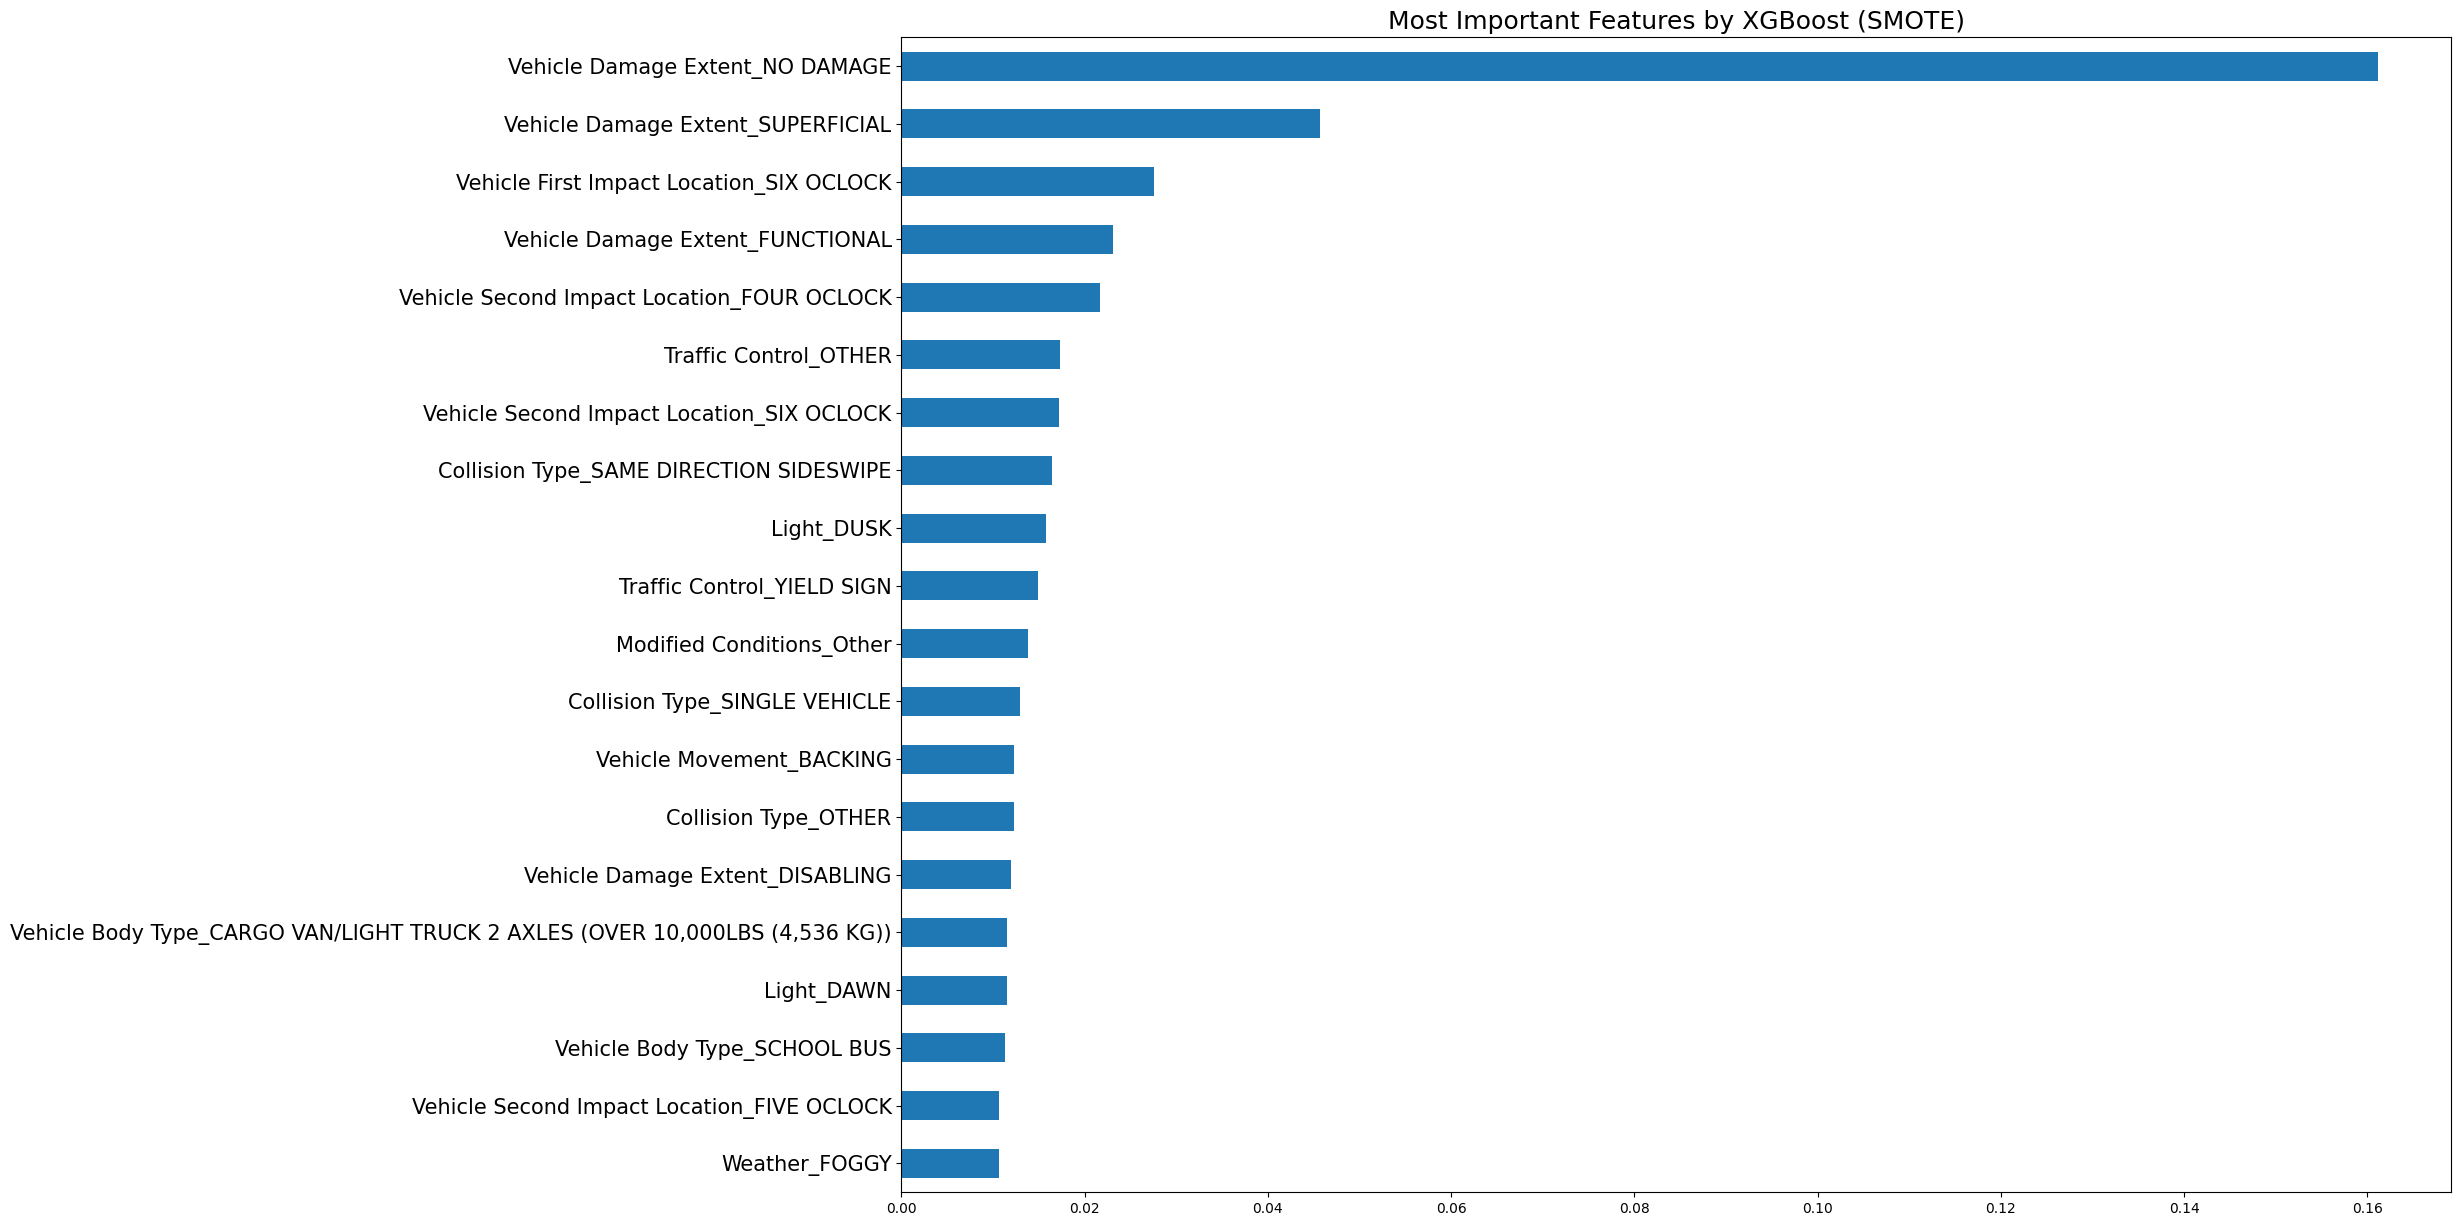

In [237]:
# Plotting the top features based on thier importance
(pd.Series(xgb_model_sm.feature_importances_, index=X.columns)
    .nlargest(20)  
    .plot(kind='barh', figsize=[20,15])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features by XGBoost (SMOTE)', size=18);

In [238]:
metrics = {
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)
xgb_metrics_sm = calculate_metrics(y_test_sm, xgb_predictions_sm)
rfc_metrics_sm = calculate_metrics(y_test_sm, rfc_predictions_sm)
log_metrics_sm = calculate_metrics(y_test_sm, log_pred_sm)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'XGBoost (SMOTE)': xgb_metrics_sm,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Random Forest (SMOTE)': rfc_metrics_sm,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os,
    'Logistic Regression (SMOTE)': log_metrics_sm
})

comparison_df

XGBoost  XGBoost (undersampled)  XGBoost (oversampled)  \
Accuracy   0.647827                0.672684               0.653559   
Precision  0.331698                0.654275               0.334291   
Recall     0.714156                0.730290               0.702686   
F1 Score   0.452996                0.690196               0.453051   

           XGBoost (SMOTE)  Random Forest  Random Forest (undersampled)  \
Accuracy          0.772512       0.580216                      0.660994   
Precision         0.416372       0.294429                      0.632299   
Recall            0.284033       0.756112                      0.767042   
F1 Score          0.337700       0.423822                      0.693183   

           Random Forest (oversampled)  Random Forest (SMOTE)  \
Accuracy                      0.607581               0.683575   
Precision                     0.313553               0.331483   
Recall                        0.775128               0.540598   
F1 Score                      0.446492               0.410968   

           Logistic Regression  Logistic Regression (undersampled)  \
Accuracy              0.629029                            0.668097   
Precision             0.315366                            0.660153   
Recall                0.697555                            0.690871   
F1 Score              0.434358                            0.675163   

           Logistic Regression (oversampled)  Logistic Regression (SMOTE)  
Accuracy                            0.644006                     0.756795  
Precision                           0.326671                     0.374852  
Recall                              0.700573                     0.286145  
F1 Score                            0.445575                     0.324546

In [239]:
kf=KFold(n_splits=5,shuffle=True,random_state=42)
xgb_parameters = {
    'n_estimators': stats.randint(100, 1000),
    'max_depth': stats.randint(1, 11),
    'learning_rate': stats.uniform(0.01, 0.99),
    'max_bin' : stats.randint(100,1000),
    'alpha': stats.uniform(0.0, 100.0),
    'min_child_weight': stats.uniform(0, 10),
    'colsample_bytree': stats.uniform(0.5, 0.5),
    'gamma': stats.uniform(0, 10),
    'subsample': stats.uniform(0.5, 0.5)
}

xgbr = XGBClassifier(random_state=42,tree_method='hist')
xgb_grid_search = RandomizedSearchCV(xgbr, xgb_parameters, cv=kf, scoring='f1', n_jobs=-1, verbose=1)
xgb_grid_search.fit(X_train_us, y_train_us)

# Best RF Model
best_xgb = xgb_grid_search.best_estimator_

# RF predictions
xgb_preds = best_xgb.predict(X_test_us)
best_params = xgb_grid_search.best_params_

print(classification_report(y_test_us, xgb_preds))
print(f'Best parameters: {xgb_grid_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits
              precision    recall  f1-score   support

           0       0.71      0.57      0.63      3384
           1       0.64      0.76      0.69      3374

    accuracy                           0.67      6758
   macro avg       0.67      0.67      0.66      6758
weighted avg       0.67      0.67      0.66      6758

Best parameters: {'alpha': 4.193226614176426, 'colsample_bytree': 0.6818449740369006, 'gamma': 8.597000846990623, 'learning_rate': 0.35198162034894165, 'max_bin': 809, 'max_depth': 2, 'min_child_weight': 8.603213396843037, 'n_estimators': 558, 'subsample': 0.9938351304663853}


In [240]:
print(f'Best score: {xgb_grid_search.best_score_}')

Best score: 0.7054592386271692


In [241]:
# applying threshold moving to the best model, which is XGBoost Undersampled
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits,random_state=42,shuffle=True)

# Placeholder for the best threshold
best_thresholds = []
best_f1_scores = []
X2.drop(unused_features.index, axis=1, inplace=True)
# Selecting top 10 features

# Loop over each fold
for train_index, test_index in skf.split(X2, y2):
    X_train_th, X_test_th = X2.iloc[train_index], X2.iloc[test_index]
    y_train_th, y_test_th = y2.iloc[train_index], y2.iloc[test_index]

    # Train the model
    xgb_model = XGBClassifier(**best_params)
    xgb_model.fit(X_train_th, y_train_th)

    # Predict probabilities
    xgb_prob = xgb_model.predict_proba(X_test_th)[:, 1]

    # Find the best threshold for this fold
    best_f1 = 0
    best_threshold = 0.5
    thresholds = np.linspace(0, 1, 101)
    for th in thresholds:
        preds = (xgb_prob >= th).astype(int)
        f1 = f1_score(y_test_th, preds)  # Corrected to use y_test_th
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    best_thresholds.append(best_threshold)
    best_f1_scores.append(best_f1)

# Calculate the average best threshold
final_best_threshold = np.mean(best_thresholds)
final_best_f1 = np.mean(best_f1_scores)

print(f'Average Best Threshold: {final_best_threshold}')
print(f'Average Best F1 Score: {final_best_f1}')

# Retrain the model on the entire dataset
xgb_model_final = XGBClassifier(**best_params)
xgb_model_final.fit(X2, y2)

# Final prediction 
xgb_prob_final = xgb_model_final.predict_proba(X2)[:, 1]
xgb_final_predictions = (xgb_prob_final >= final_best_threshold).astype(int)

# Final evaluation report
print('------------------------------------------------------------')
print(f'Final Model Performance with Threshold of {final_best_threshold}')
print(classification_report(y2, xgb_final_predictions, target_names=['No Injury', 'Injury']))


Average Best Threshold: 0.39
Average Best F1 Score: 0.7209594315104655
------------------------------------------------------------
Final Model Performance with Threshold of 0.39
              precision    recall  f1-score   support

   No Injury       0.81      0.40      0.53     16893
      Injury       0.60      0.90      0.72     16893

    accuracy                           0.65     33786
   macro avg       0.70      0.65      0.63     33786
weighted avg       0.70      0.65      0.63     33786



In [242]:
metrics = { 
    'Accuracy': accuracy_score,
    'Precision': lambda y_true, y_pred: precision_score(y_true, y_pred),
    'Recall': lambda y_true, y_pred: recall_score(y_true, y_pred),
    'F1 Score': lambda y_true, y_pred: f1_score(y_true, y_pred),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)    
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)
xgb_metrics_sm = calculate_metrics(y_test_sm, xgb_predictions_sm)
rfc_metrics_sm = calculate_metrics(y_test_sm, rfc_predictions_sm)
log_metrics_sm = calculate_metrics(y_test_sm, log_pred_sm)
xgb_metrics_final = calculate_metrics(y2, xgb_final_predictions)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'XGBoost (SMOTE)': xgb_metrics_sm,
    'XGBoost (0.38 Threshold )': xgb_metrics_final,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Random Forest (SMOTE)': rfc_metrics_sm,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os,
    'Logistic Regression (SMOTE)': log_metrics_sm
})

comparison_df

XGBoost  XGBoost (undersampled)  XGBoost (oversampled)  \
Accuracy   0.647827                0.672684               0.653559   
Precision  0.331698                0.654275               0.334291   
Recall     0.714156                0.730290               0.702686   
F1 Score   0.452996                0.690196               0.453051   

           XGBoost (SMOTE)  XGBoost (0.38 Threshold )  Random Forest  \
Accuracy          0.772512                   0.651927       0.580216   
Precision         0.416372                   0.601047       0.294429   
Recall            0.284033                   0.903688       0.756112   
F1 Score          0.337700                   0.721933       0.423822   

           Random Forest (undersampled)  Random Forest (oversampled)  \
Accuracy                       0.660994                     0.607581   
Precision                      0.632299                     0.313553   
Recall                         0.767042                     0.775128   
F1 Score                       0.693183                     0.446492   

           Random Forest (SMOTE)  Logistic Regression  \
Accuracy                0.683575             0.629029   
Precision               0.331483             0.315366   
Recall                  0.540598             0.697555   
F1 Score                0.410968             0.434358   

           Logistic Regression (undersampled)  \
Accuracy                             0.668097   
Precision                            0.660153   
Recall                               0.690871   
F1 Score                             0.675163   

           Logistic Regression (oversampled)  Logistic Regression (SMOTE)  
Accuracy                            0.644006                     0.756795  
Precision                           0.326671                     0.374852  
Recall                              0.700573                     0.286145  
F1 Score                            0.445575                     0.324546

## Final Model
The best model is the XGBoost model with the undersampled data using the following hyperparamenters obtained through a randomized grid search:
- alpha': 0.9089896374720685
-  'colsample_bytree': 0.6636960107039301
- 'gamma': 0.5171661648087356
- 'learning_rate': 0.10453669493855258
- 'max_bin': 762
- 'max_depth': 2
- 'min_child_weight': 2.7948742521264034
- 'n_estimators': 198
- 'subsample': 0.8593135239749632

### Optimizing for parsimony and performance
- The top 20 features seem to produce the same performance as having higher dimensionality

In [246]:
# try to reduce number of features to increase parsimony
top_features = list(feature_importances.head(20).index)
X5 = X2[top_features]

# applying threshold moving to the best model, which is XGBoost Undersampled
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=42, shuffle=True)

# Placeholder for the best threshold
best_thresholds = []
best_f1_scores = []

# Loop over each fold using the dataset with top features
for train_index, test_index in skf.split(X5, y2):
    X_train_th, X_test_th = X5.iloc[train_index], X5.iloc[test_index]
    y_train_th, y_test_th = y2.iloc[train_index], y2.iloc[test_index]

    # Train the model with best parameters on the reduced feature set
    xgb_model = XGBClassifier(**best_params)
    xgb_model.fit(X_train_th, y_train_th)

    # Predict probabilities on the test set
    xgb_prob = xgb_model.predict_proba(X_test_th)[:, 1]

    # Find the best threshold for this fold
    best_f1 = 0
    best_threshold = 0.5
    thresholds = np.linspace(0, 1, 101)
    for th in thresholds:
        preds = (xgb_prob >= th).astype(int)
        f1 = f1_score(y_test_th, preds)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = th

    best_thresholds.append(best_threshold)
    best_f1_scores.append(best_f1)

# Calculate the average best threshold
final_best_threshold = np.mean(best_thresholds)
final_best_f1 = np.mean(best_f1_scores)

print(f'Average Best Threshold: {final_best_threshold}')
print(f'Average Best F1 Score: {final_best_f1}')

# Retrain the model on the entire dataset with reduced features
xgb_model_final = XGBClassifier(**best_params)
xgb_model_final.fit(X5, y2)

# Final prediction using the model trained on reduced features
xgb_prob_final = xgb_model_final.predict_proba(X5)[:, 1]
xgb_final_predictions = (xgb_prob_final >= final_best_threshold).astype(int)

# Final evaluation report
print('------------------------------------------------------------')
print(f'Final Model Performance with Threshold of {final_best_threshold}')
print(classification_report(y2, xgb_final_predictions, target_names=['No Injury', 'Injury']))


Average Best Threshold: 0.386
Average Best F1 Score: 0.7204850097691391
------------------------------------------------------------
Final Model Performance with Threshold of 0.386
              precision    recall  f1-score   support

   No Injury       0.80      0.39      0.52     16893
      Injury       0.60      0.91      0.72     16893

    accuracy                           0.65     33786
   macro avg       0.70      0.65      0.62     33786
weighted avg       0.70      0.65      0.62     33786



## Interpreting the Model
- Tools like LIME and SHAP enhances model's Interpretability. Allows us to see how the model is making its predictions.
- Recall that the optimal decision threshold is 0.38. Probability of injury over 0.38 should be claissified as Emergent

In [250]:
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=X5.values,
    feature_names=X5.columns,
    class_names=['Non-Emergent', 'Emergent'],
    mode='classification',
    random_state=42
)
# Choose an instance 
instance_index = 102
instance = X5.iloc[instance_index].values

explanation = explainer.explain_instance(instance, xgb_model_final.predict_proba, num_features=20)

explanation.show_in_notebook(show_predicted_value=True)


[19:49:05] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
100%|===================| 33735/33786 [00:51<00:00]        

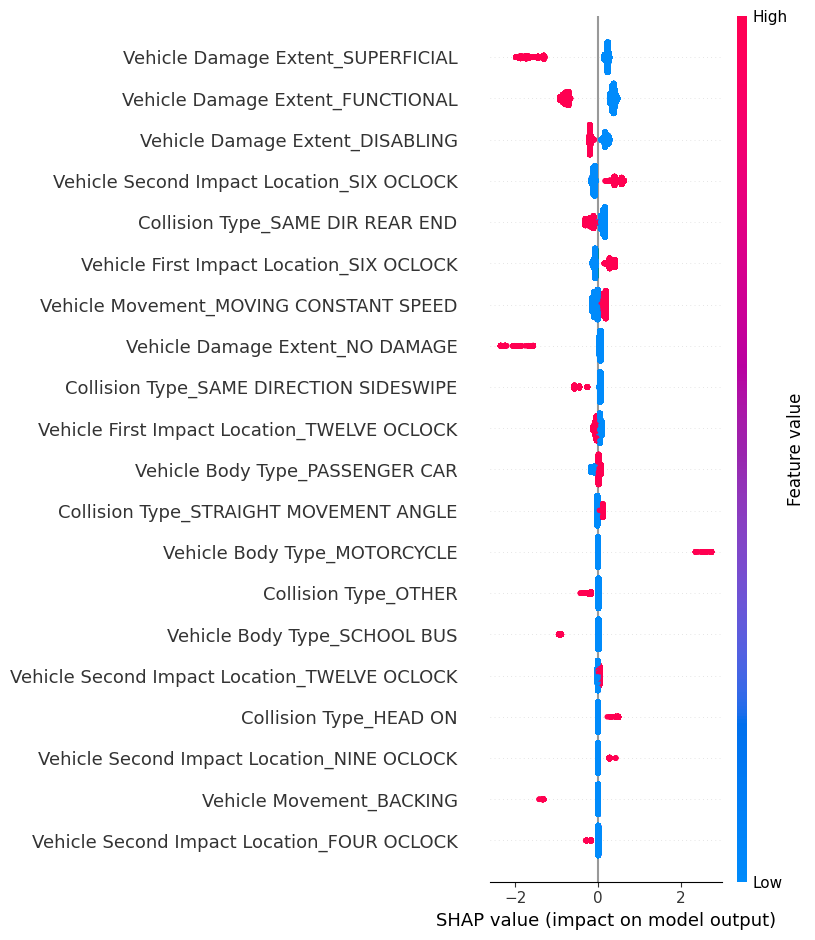

In [254]:
explainer = shap.Explainer(xgb_model_final, X5,output_names=['Non-Emergent', 'Emergent'],seed=42)
shap_values = explainer.shap_values(X5)
# Summary plot
shap.summary_plot(shap_values, X5)
